# 拡張カルマンフィルタ

## はじめに
カルマンフィルタといったら一般的に線形カルマンフィルタのことを指すが、この線形カルマンフィルタは線形システムのモデルにしか適用できない。

そこで、この線形カルマンフィルタを非線形モデルに適用できるよう拡張されたのが拡張カルマンフィルタ(Extended Kalman Filter, EKF)となります。

## 拡張カルマンフィルタ

- #### 状態空間モデル（線形）

$$
{\begin{align}
    \boldsymbol{x}(k+1) &= \boldsymbol{A} \boldsymbol{x}(k) + 
    \boldsymbol{B} \boldsymbol{u}(k) +  \boldsymbol{v}(k) \tag{1}\\
    \boldsymbol{y}(k) &= \boldsymbol{C} \boldsymbol{x}(k) + \boldsymbol{w}(k)  \tag{2}\\
\end{align}
}
$$

- #### 状態空間モデル（非線形）

$$
{\begin{align}
    \boldsymbol{x}(k+1) &= \boldsymbol{f}(\boldsymbol{x}(k), \boldsymbol{u}(k)) +  \boldsymbol{v}(k) \tag{3}\\
    \boldsymbol{y}(k) &= \boldsymbol{h}(\boldsymbol{x}(k)) + \boldsymbol{w}(k)  \tag{4}\\
\end{align}
}
$$


但し、
$$f(⋅)f(⋅)：x(k)x(k)及び、(k)u(k)の非線形関数
h(⋅)h(⋅)：x(k)x(k)の非線形関数$$

$$f(⋅)f(⋅)とh(⋅)h(⋅)$$
は、どちらの非線形関数であるため、直接共分散行列を計算することができません。しかし、これらの関数を線形近似することによって線形カルマンフィルタと同じ要領で解くことができます。線形システムと非線形システムは対立する関係ではなく、非線形システムの特殊な場合が線形システムであるととらえることが重要です。
拡張カルマンフィルタでは非線形の状態方程式と観測方程式の偏微分行列（ヤコビアン）を用います。

$$
{\begin{align}
    \boldsymbol{A}(k) &= \left.\frac{\partial \boldsymbol{f}(\boldsymbol{x},    \boldsymbol{u})}{\partial \boldsymbol{x}}\right|_{\boldsymbol{x}=\boldsymbol{\hat{x}}(k), \boldsymbol{u}=\boldsymbol{u}(k)} \tag{5}\\
    \boldsymbol{C}(k) &= \left.\frac{\partial \boldsymbol{h}(\boldsymbol{x})}{\partial \boldsymbol{x}}\right|_{\boldsymbol{x}=\boldsymbol{\hat{x}}(k)} \tag{6}\\
\end{align}
}
$$

この場合のカルマンフィルタの時間更新式は次の通り

- #### 予測ステップ

$$
{\begin{align}
事前状態推定値&：　\boldsymbol{\hat{x}}^-(k) = \boldsymbol{f}(\boldsymbol{\hat{x}}(k-1), \boldsymbol{u}(k-1)) \tag{7}\\
線形近似&：　\boldsymbol{A}(k-1) = \left.\frac{\partial \boldsymbol{f}(\boldsymbol{x}, \boldsymbol{u})}{\partial \boldsymbol{x}}\right|_{\boldsymbol{x}=\boldsymbol{\hat{x}}(k-1), \boldsymbol{u}=\boldsymbol{u}(k-1)} \tag{8}\\
&　　\boldsymbol{C}(k) = \left.\frac{\partial \boldsymbol{h}(\boldsymbol{x})}{\partial \boldsymbol{x}}\right|_{\boldsymbol{x}=\boldsymbol{\hat{x}}(k)} \tag{9}\\
事前誤差共分散行列&：　\boldsymbol{P}^-(k) = \boldsymbol{A}(k-1) \boldsymbol{P}(k-1) \boldsymbol{A}^T(k-1) + \boldsymbol{Q}(k-1) \tag{10}\\
\end{align}
}
$$

- #### フィルタリングステップ
$$
{\begin{align}
    カルマンゲイン行列&：　\boldsymbol{G}(k) = \boldsymbol{P}^-(k) \boldsymbol{C}^T(k) (\boldsymbol{C}(k) \boldsymbol{P}^-(k) \boldsymbol{C}^T(k) + \boldsymbol{R}(k))^{-1} \tag{11}\\
    状態推定値&：　\boldsymbol{\hat{x}}(k) = \boldsymbol{\hat{x}}^-(k) + \boldsymbol{G}(k)(\boldsymbol{y}(k) - \boldsymbol{h} (\boldsymbol{\hat{x}}^-(k)) \tag{12}\\
    事後誤差共分散行列&：　\boldsymbol{P}(k) = (\boldsymbol{I} - \boldsymbol{G}(k) \boldsymbol{C}) \boldsymbol{P}^-(k) \tag{13}\\
\end{align}
}
$$

### 例題

2次元座標において、あるロボットが速度v[m/s]v[m/s]、角速度ω[deg/s]ω[deg/s]で周回移動するものとします。このとき、ロボットの移動には誤差v(k)v(k)を含みます。また、ロボットの位置を観測するセンサも誤差w(k)w(k)を含みます。サンプリング周期はΔtΔtとします。ここで、観測された軌跡から実際の軌跡を拡張カルマンフィルタによって推定します。
ここで、ロボットの姿勢を定義します。

x,y,θx,y,θはそれぞれ、ロボットのXX座標、YY座標、姿勢角を表し、姿勢ベクトルx(k)x(k)は以下のように定義されます。<br/>


$$
{\boldsymbol{x}(k) = 
\begin{bmatrix}
x(k) \\
y(k) \\
\theta(k) \\
\end{bmatrix} \tag{14}\\
}
$$

よって状態方程式は以下のようになります。

$$
{\begin{align}
\boldsymbol{\hat{x}}^-(k+1) &= \boldsymbol{f}(\boldsymbol{\hat{x}}(k),\boldsymbol{u}(k)) \\
&=
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{bmatrix}
\boldsymbol{\hat{x}}^-(k)
 + 
\begin{bmatrix}
v & 0 & 0 \\
0 & v & 0 \\
0 & 0 & \omega \\
\end{bmatrix}
\boldsymbol{u}(k) \\
\end{align} \tag{15}\\
}
$$

$$
{\boldsymbol{u}(k) = \begin{bmatrix}
\Delta t \cdot cos\theta(k) \\
\Delta t \cdot sin\theta(k) \\
\Delta t \\
\end{bmatrix} \tag{16}\\
}
$$

するとヤコビアンは以下のように求められます。

$$
{\frac{\partial \boldsymbol{f}(\boldsymbol{x},    \boldsymbol{u})}{\partial \boldsymbol{x}} = 
\begin{bmatrix}
1 & 0 & v \cdot \Delta t \cdot cos\theta(k) \\
0 & 1 & v \cdot \Delta t \cdot sin\theta(k) \\
0 & 0 & 1 \\
\end{bmatrix}
 \tag{17}\\
}
$$

$$
次は観測値y(k)y(k)を定義します。 \\
まず、観測ベクトルy(k)y(k)を以下のように定義します。\\
{\boldsymbol{y}(k) = 
\begin{bmatrix}
x(k) \\
y(k) \\
\end{bmatrix} \tag{18}\\
}\\
x,yx,yはそれぞれ、観測されたロボットのXX座標、YY座標を表します。
$$

次に、観測値y(k)y(k)は「真の位置xgt(k)xgt(k)+観測雑音w(k)w(k)」で与えられるものとします。そうすると、観測値は以下の式で算出されます。

$$
{\boldsymbol{y}(k) = 
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
\end{bmatrix}
\boldsymbol{x}_{gt}(k)
 + \boldsymbol{w}(k)
 \tag{19}\\
}
$$



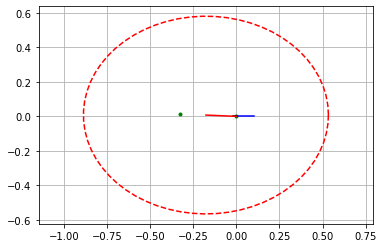

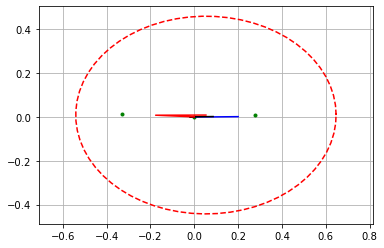

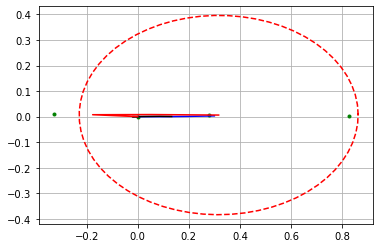

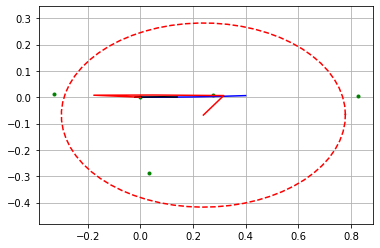

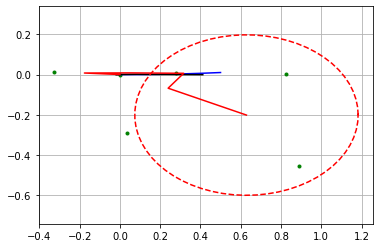

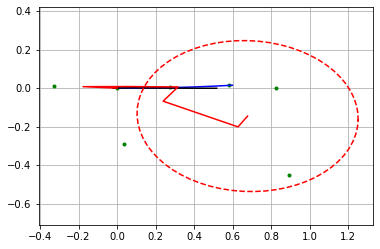

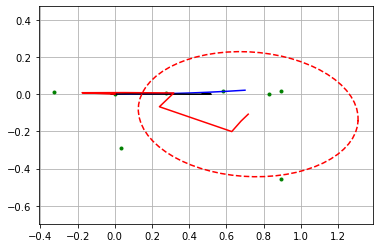

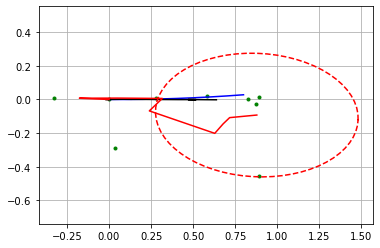

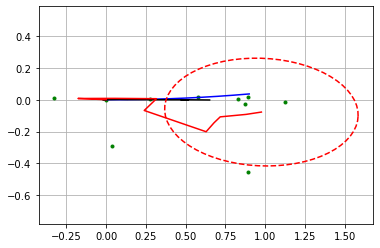

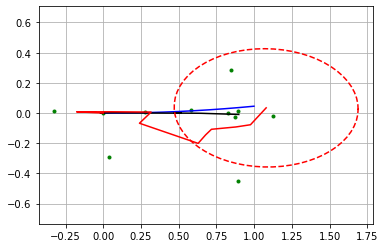

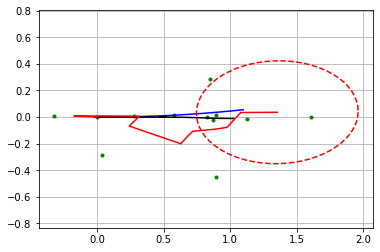

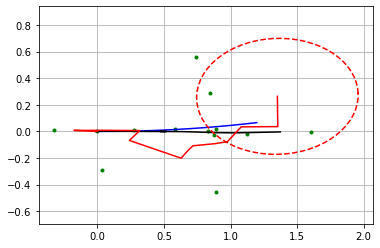

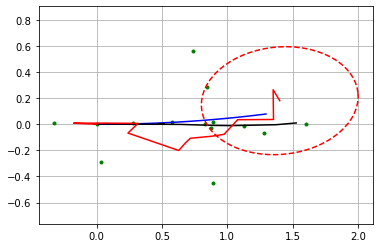

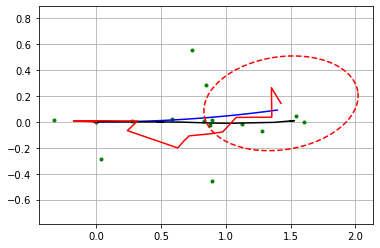

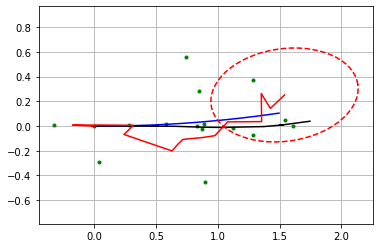

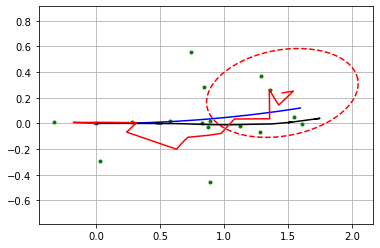

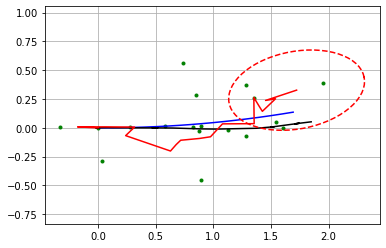

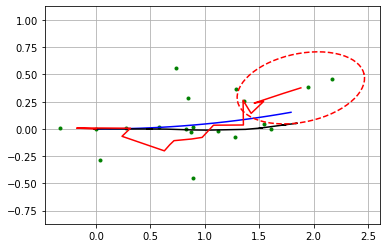

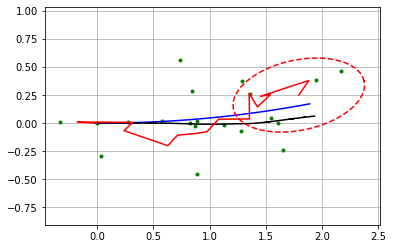

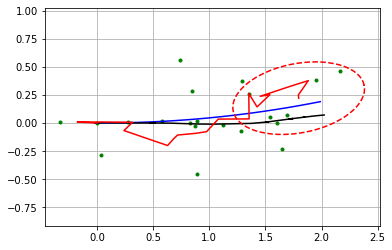

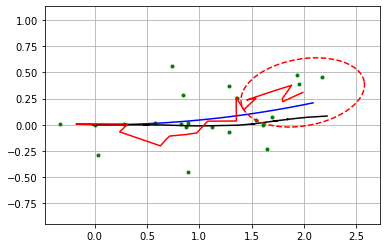

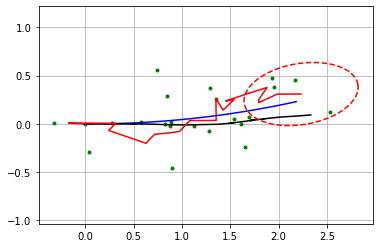

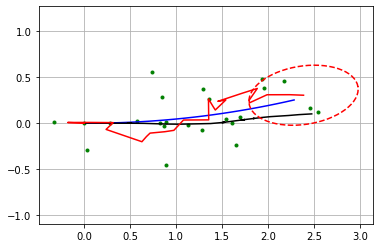

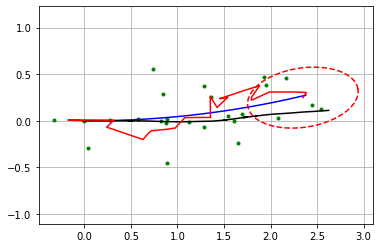

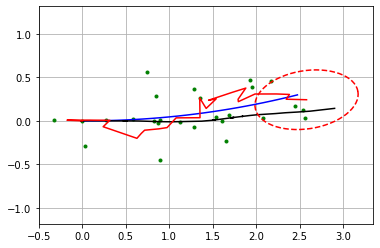

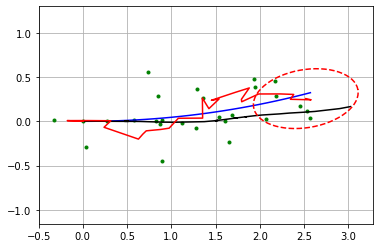

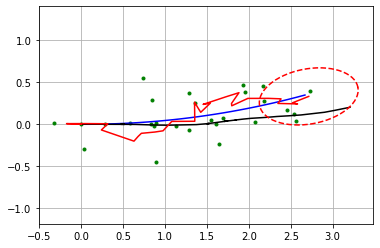

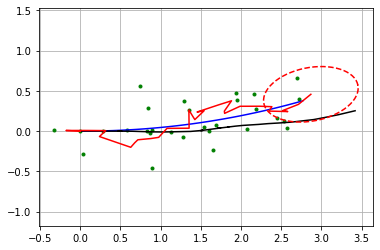

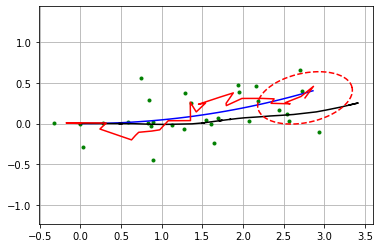

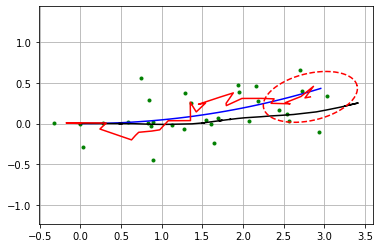

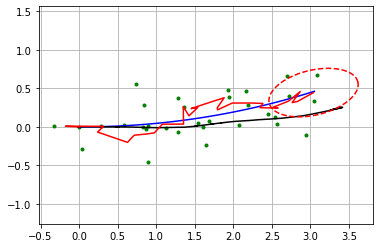

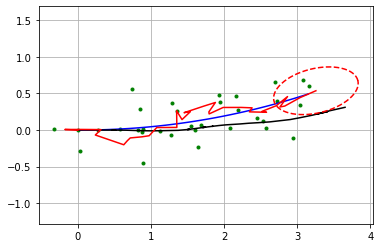

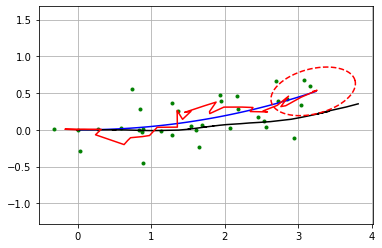

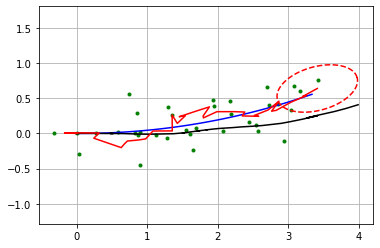

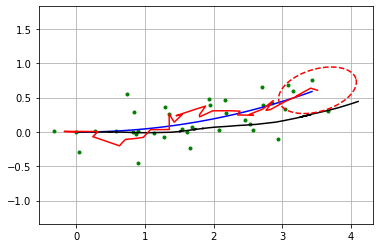

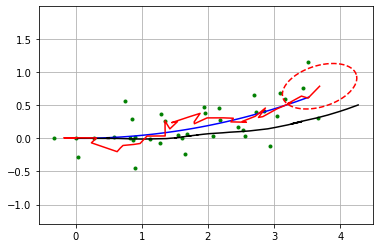

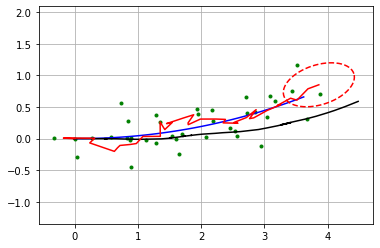

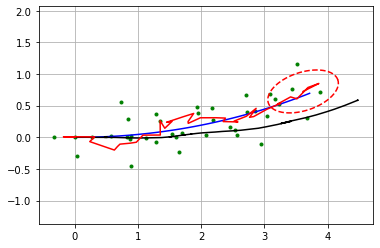

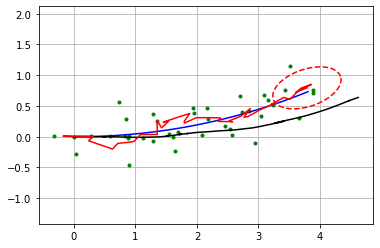

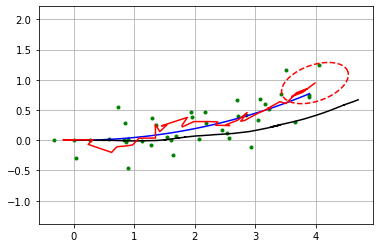

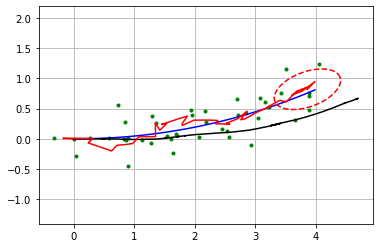

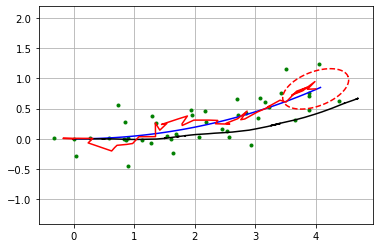

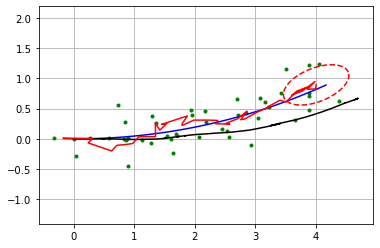

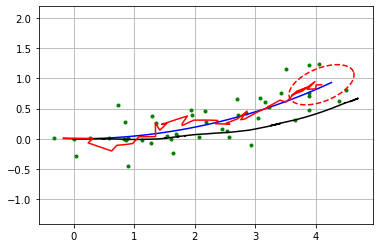

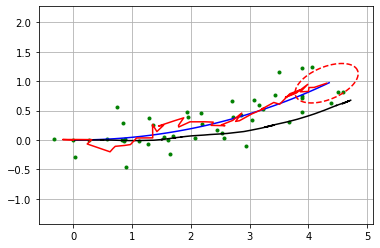

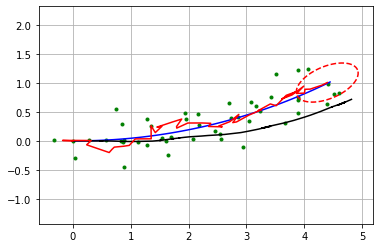

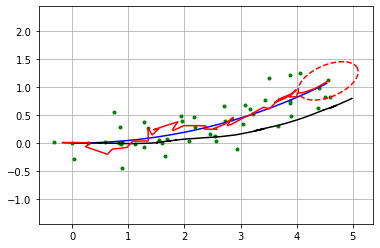

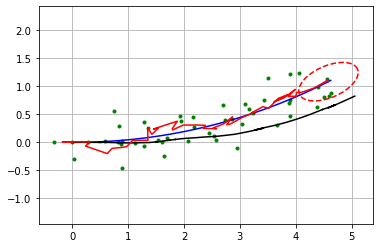

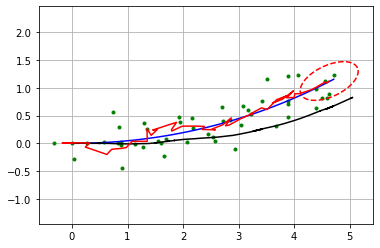

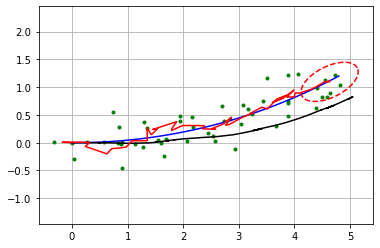

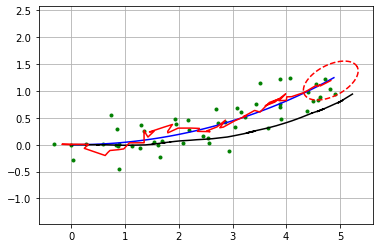

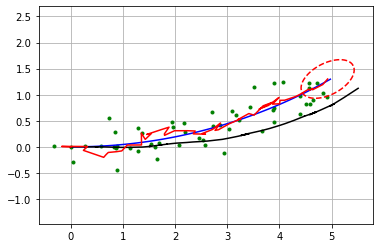

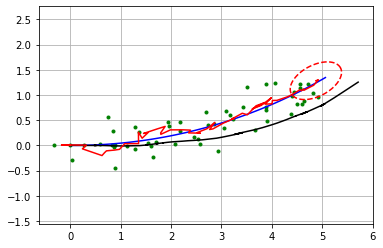

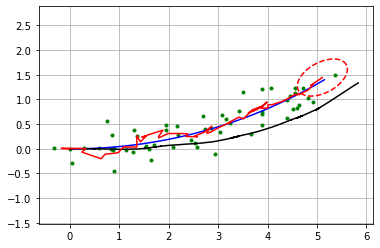

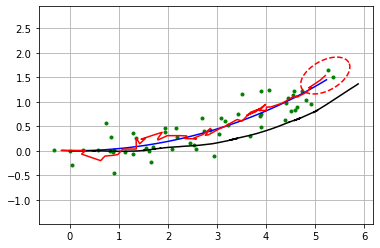

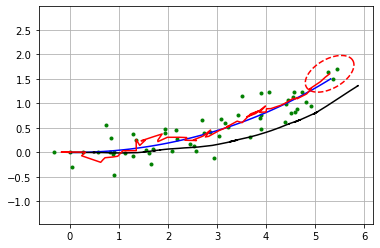

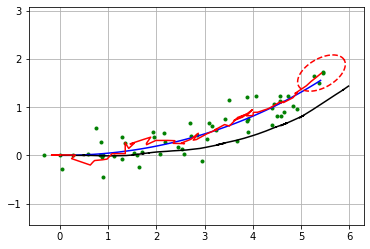

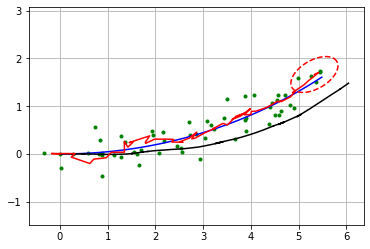

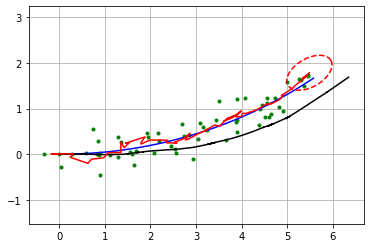

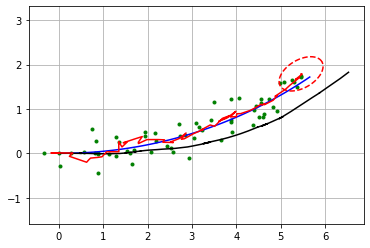

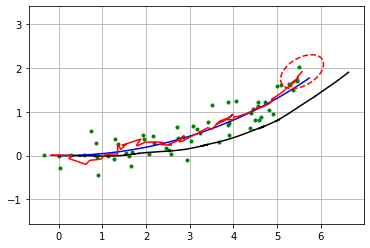

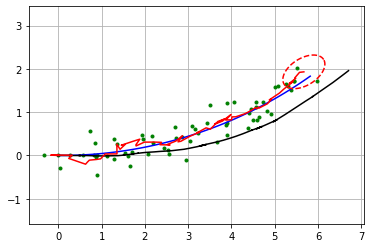

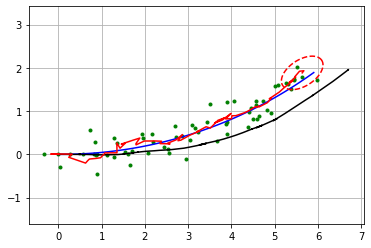

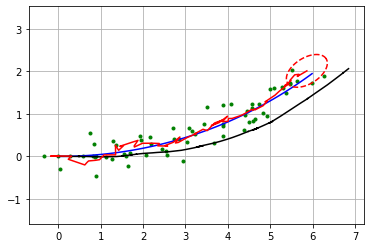

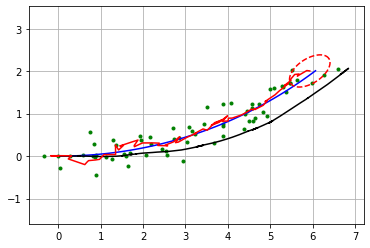

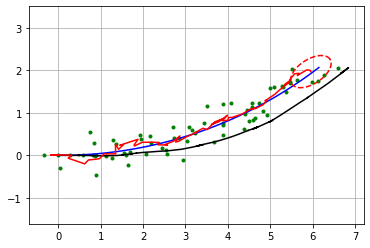

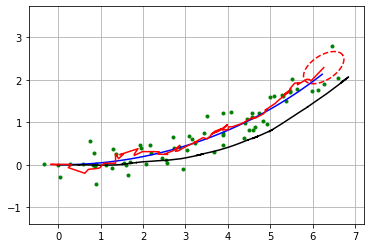

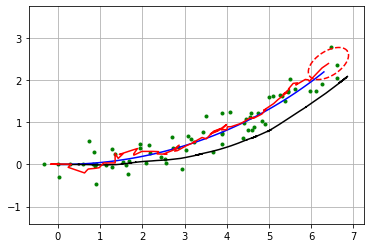

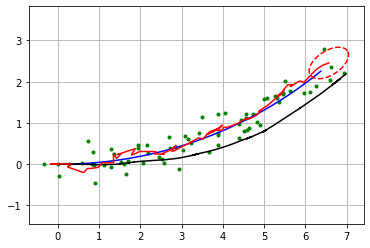

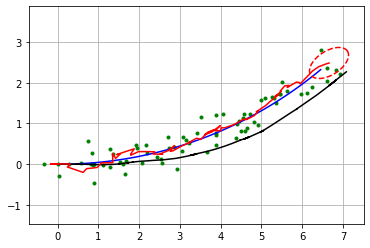

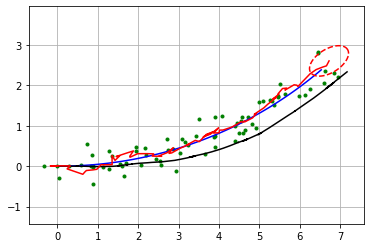

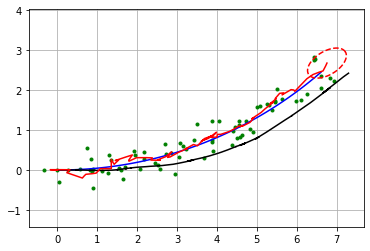

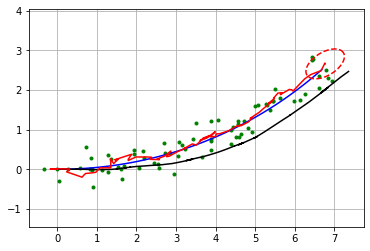

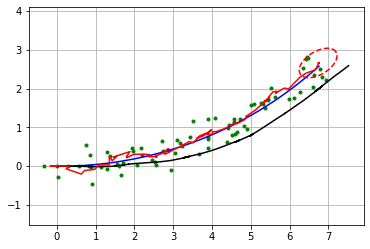

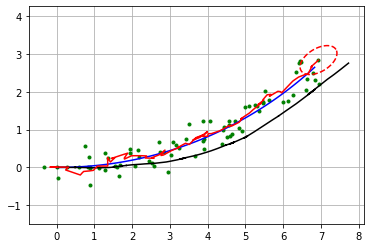

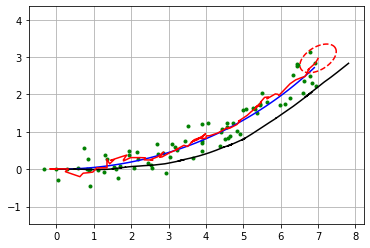

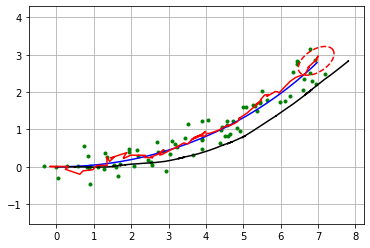

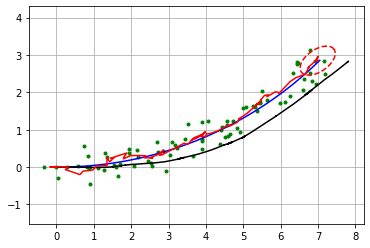

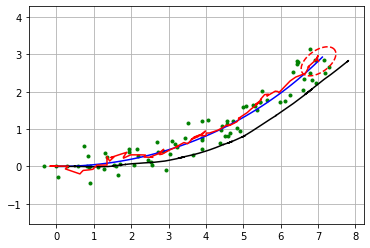

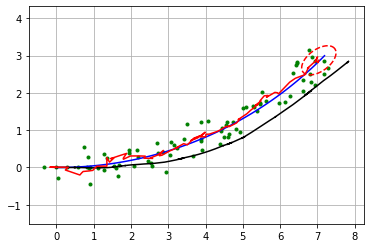

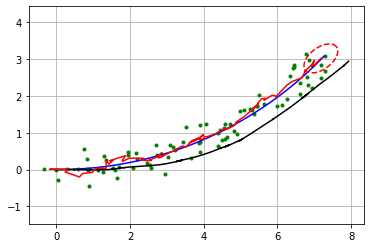

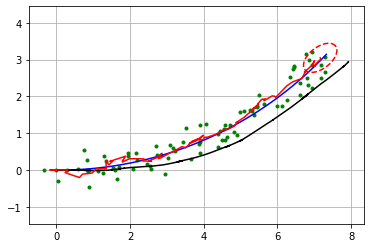

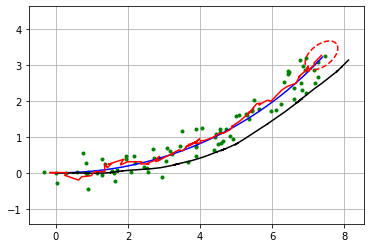

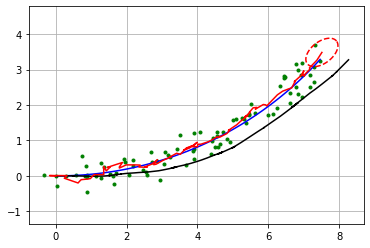

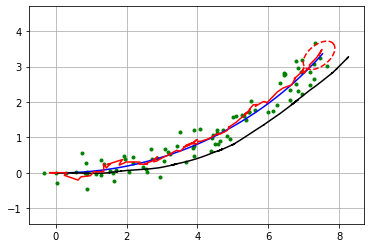

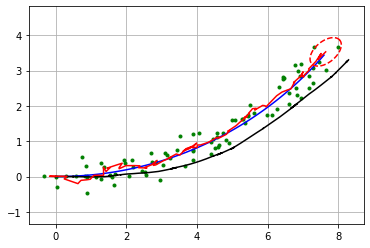

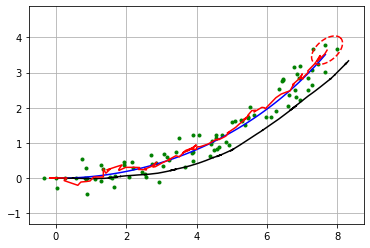

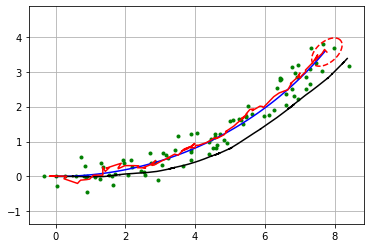

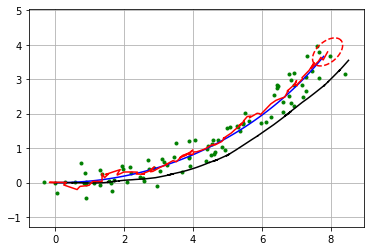

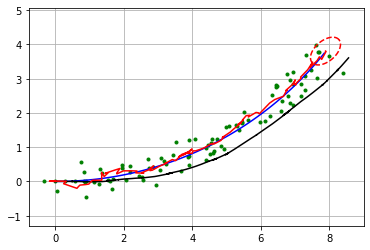

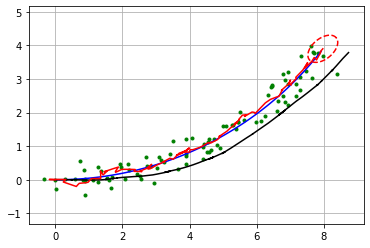

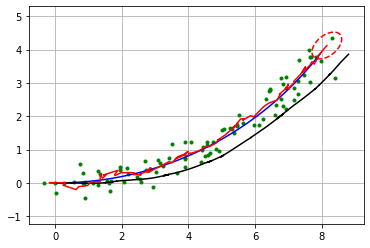

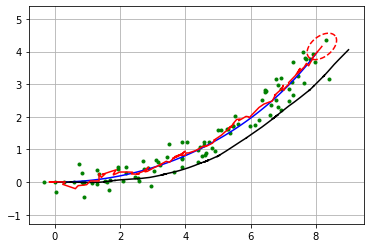

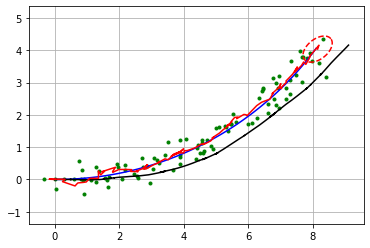

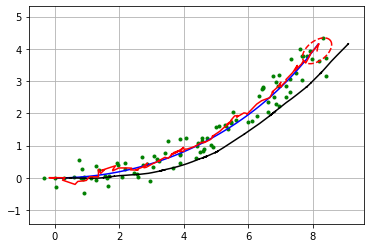

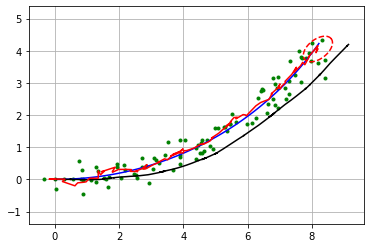

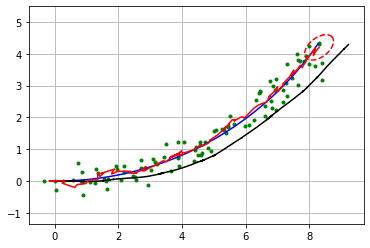

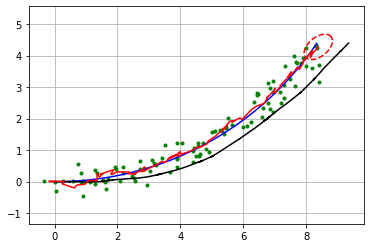

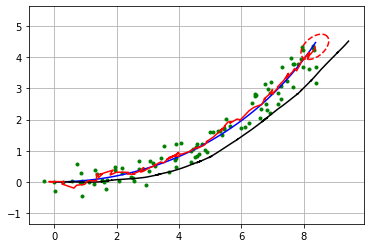

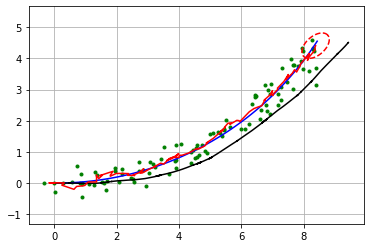

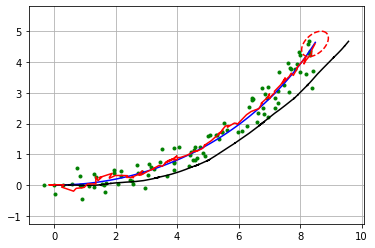

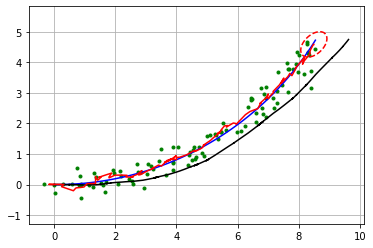

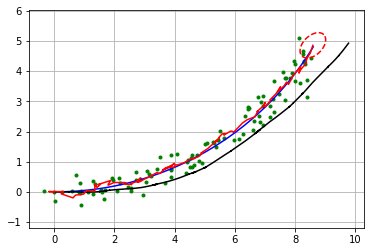

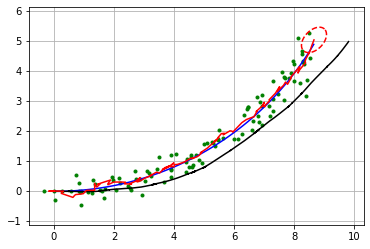

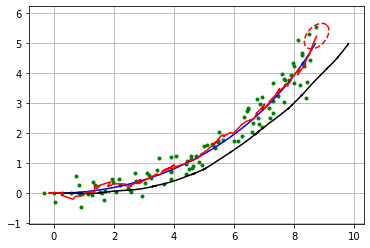

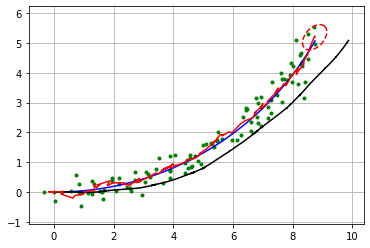

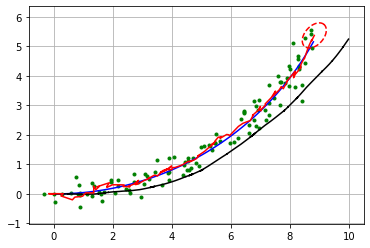

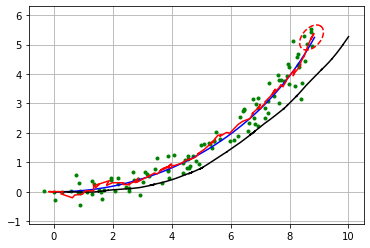

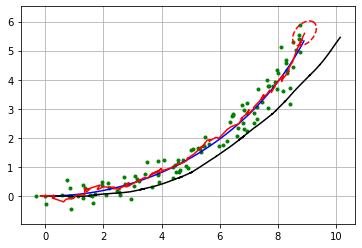

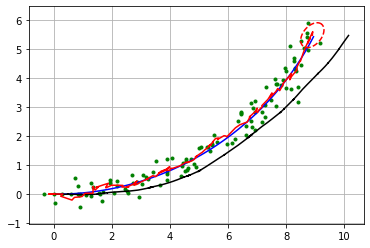

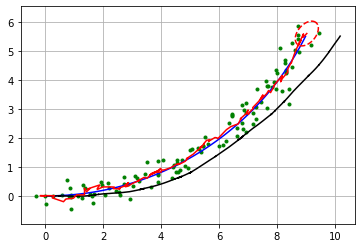

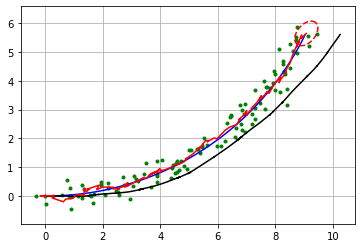

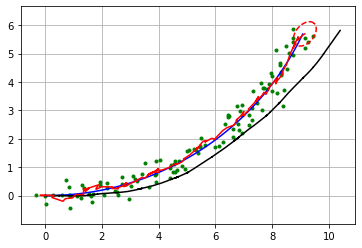

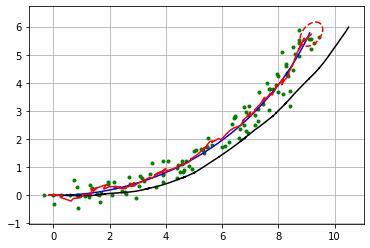

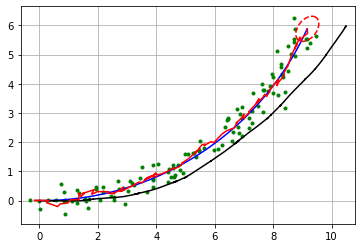

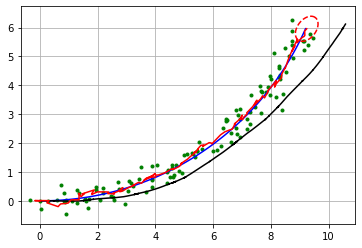

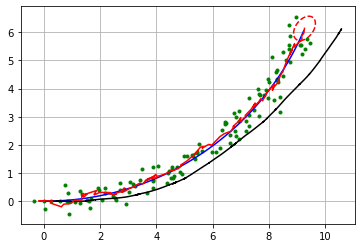

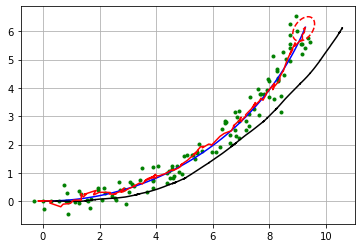

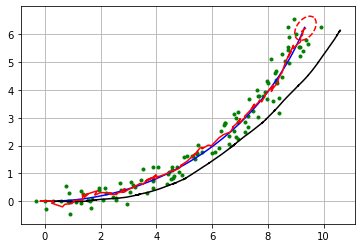

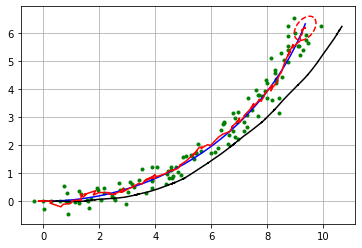

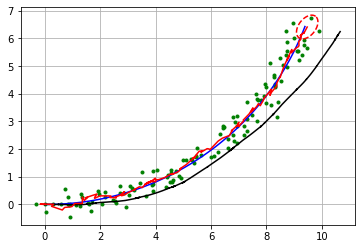

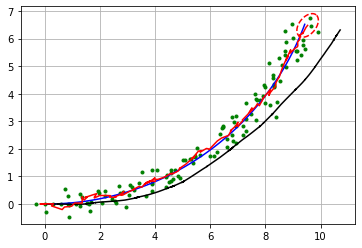

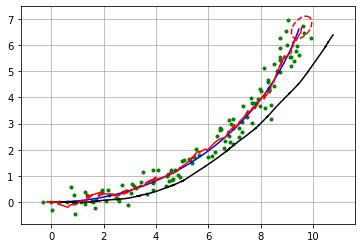

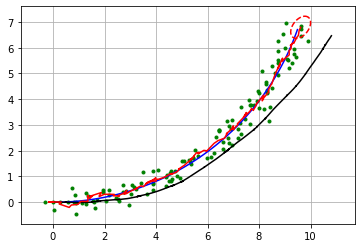

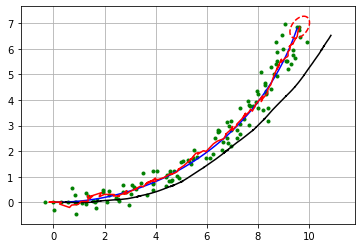

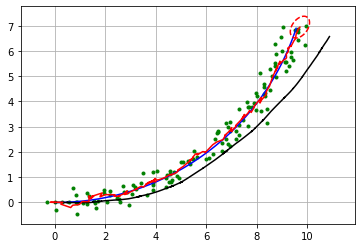

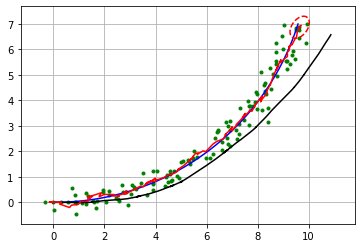

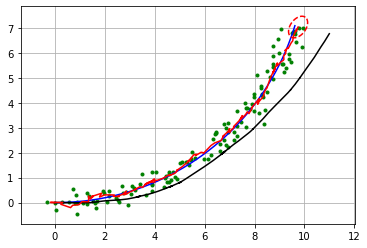

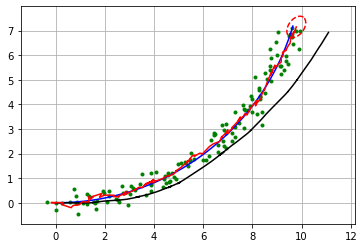

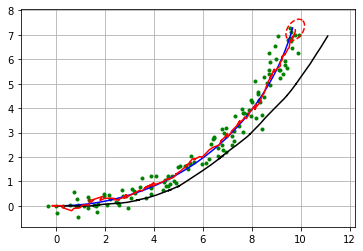

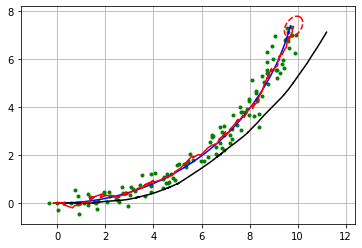

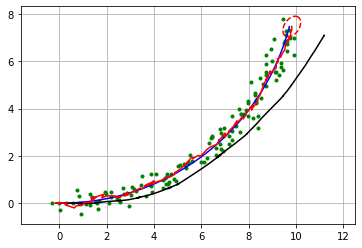

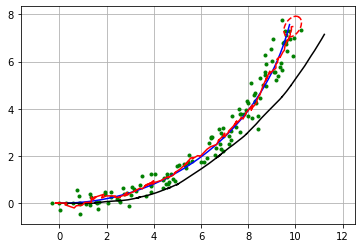

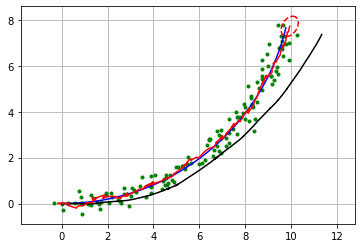

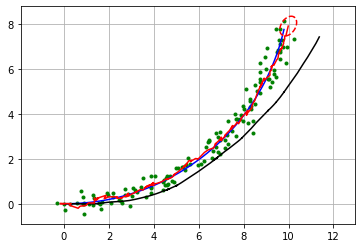

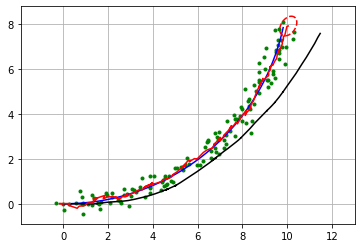

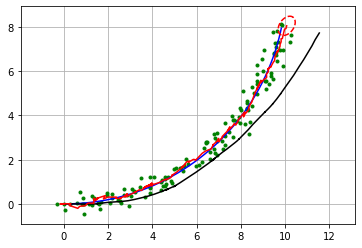

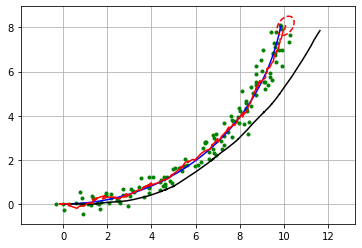

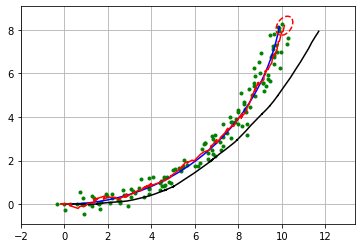

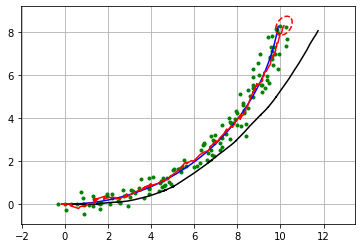

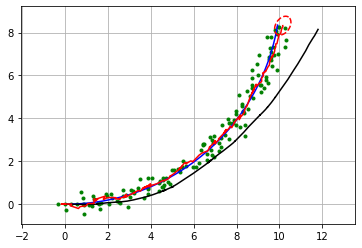

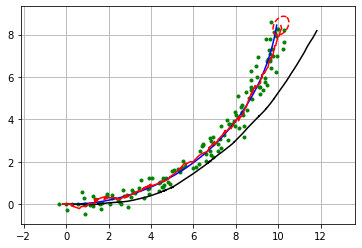

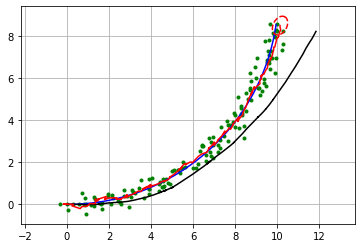

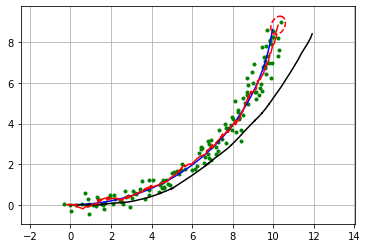

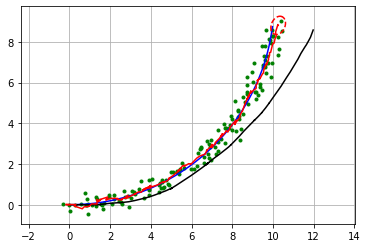

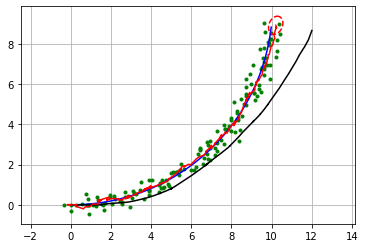

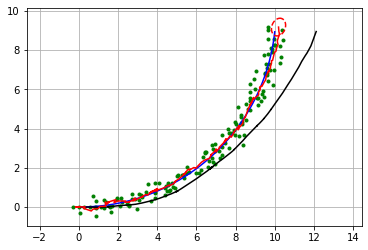

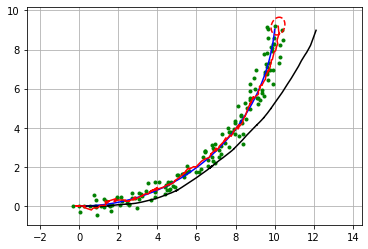

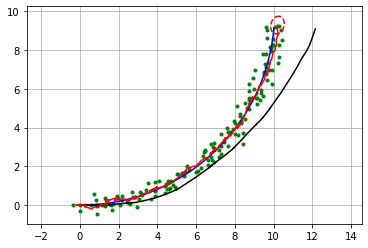

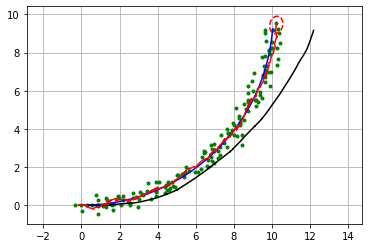

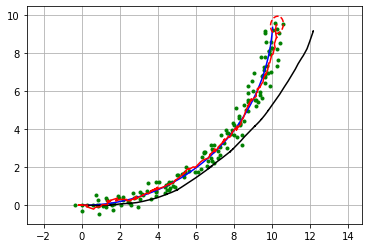

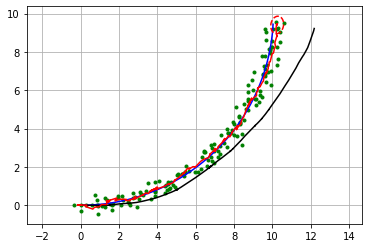

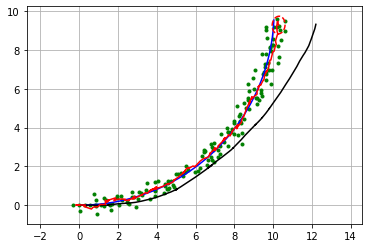

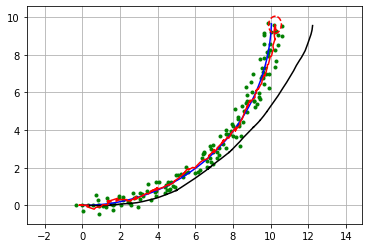

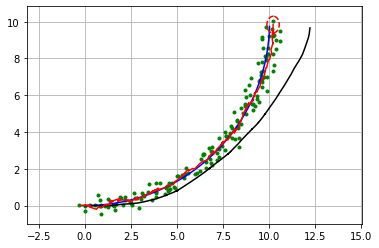

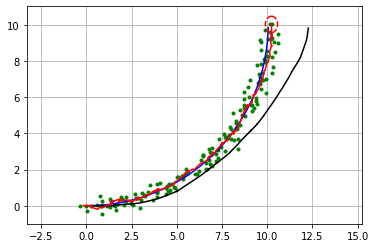

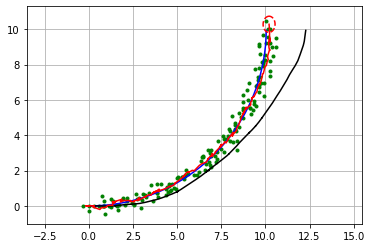

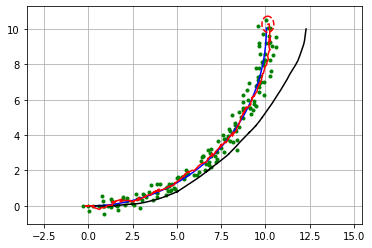

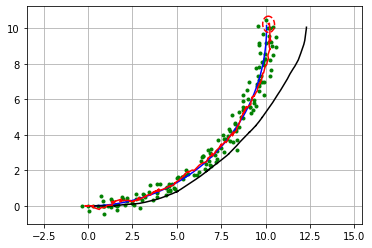

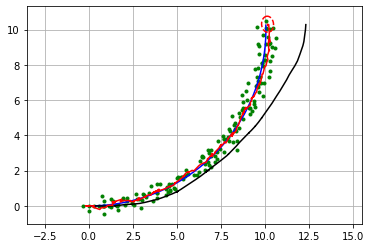

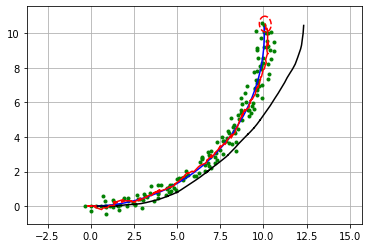

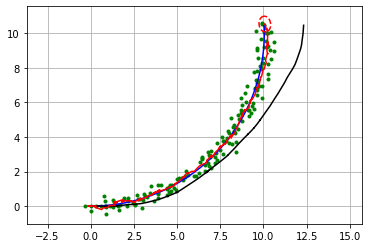

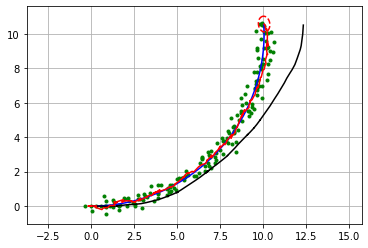

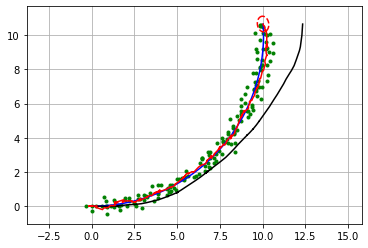

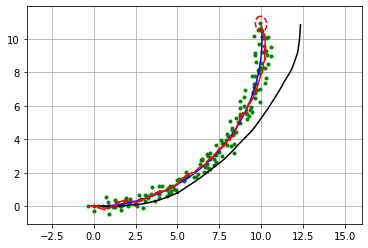

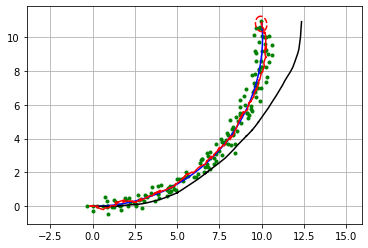

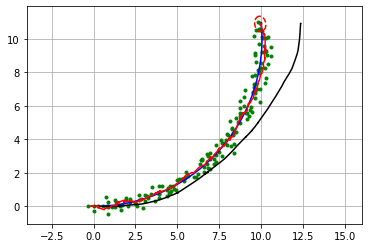

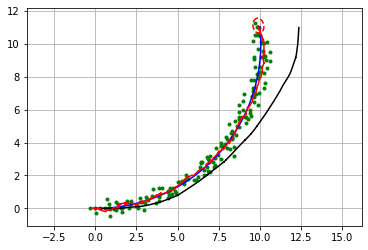

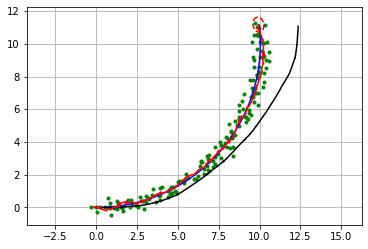

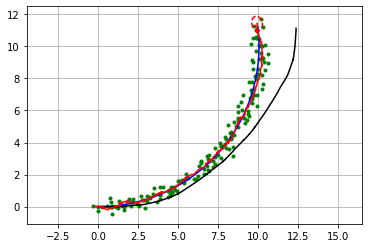

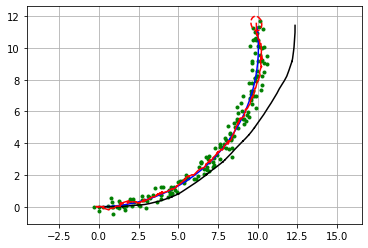

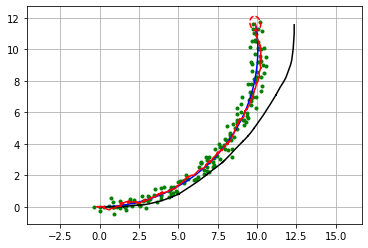

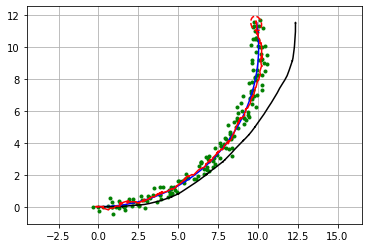

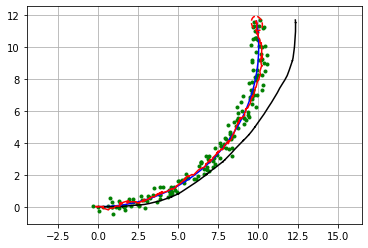

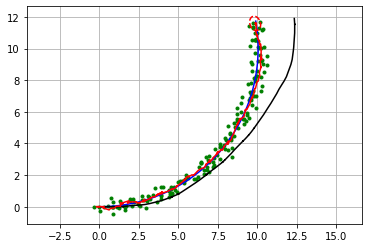

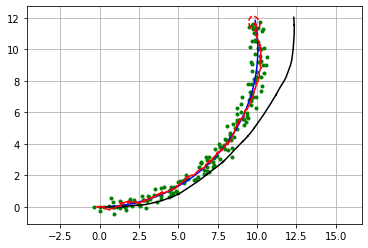

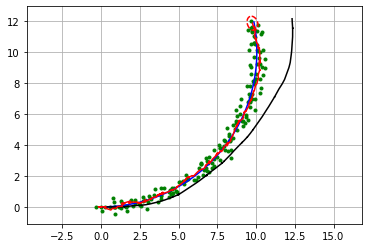

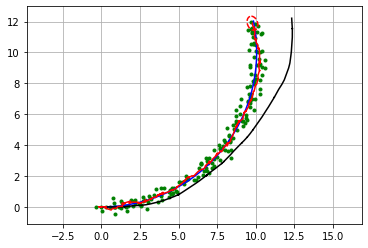

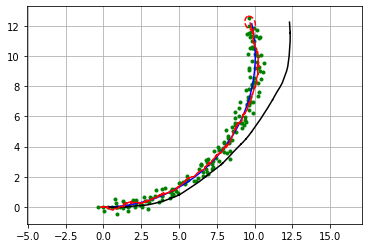

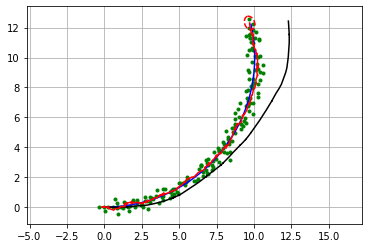

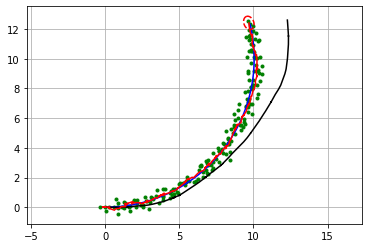

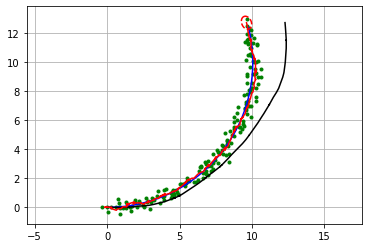

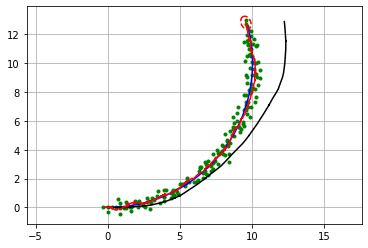

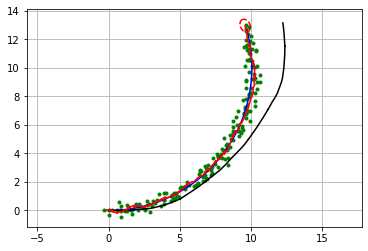

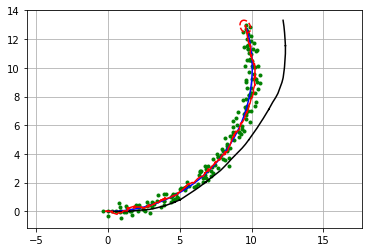

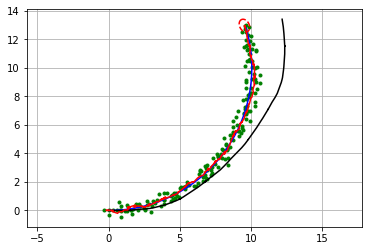

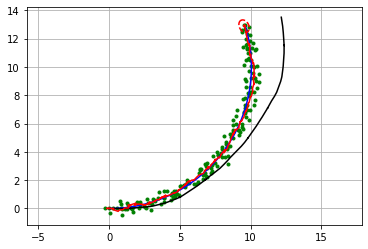

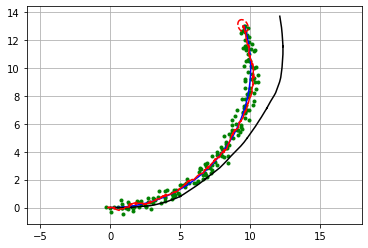

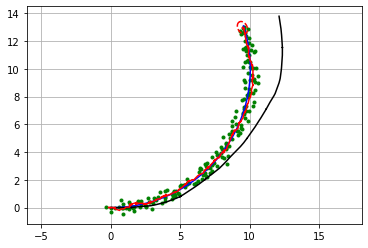

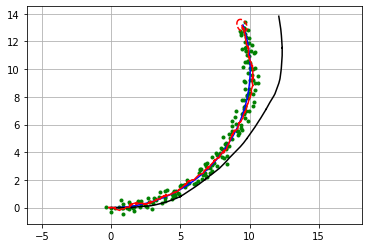

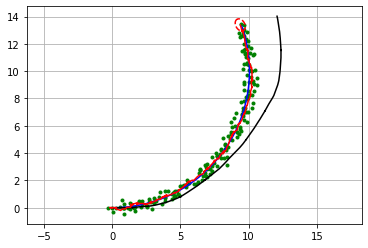

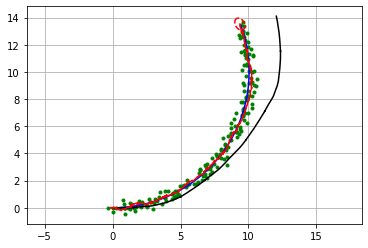

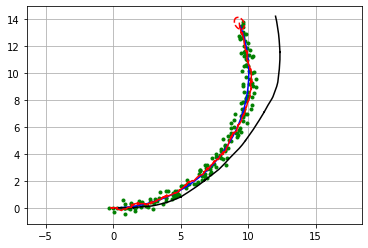

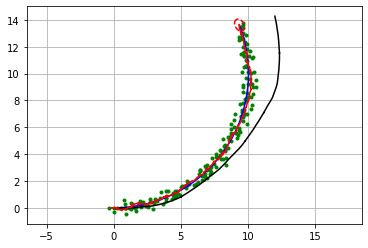

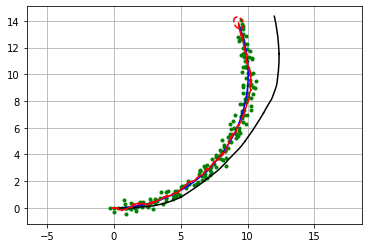

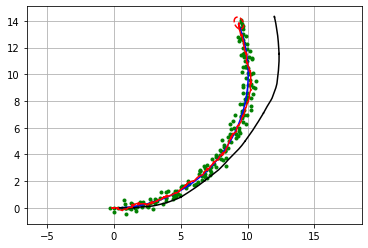

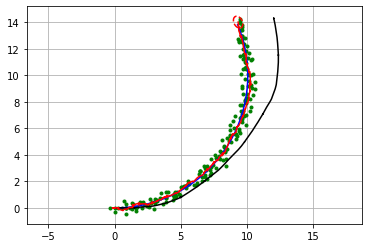

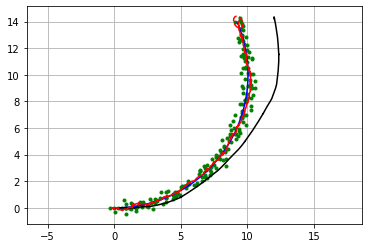

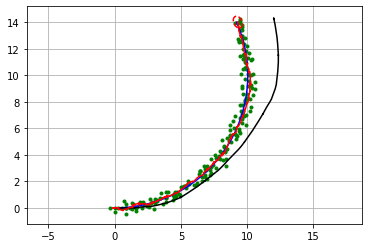

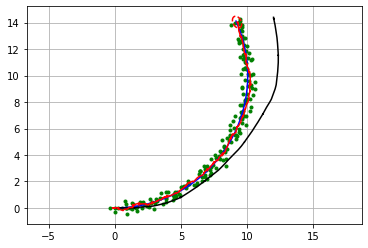

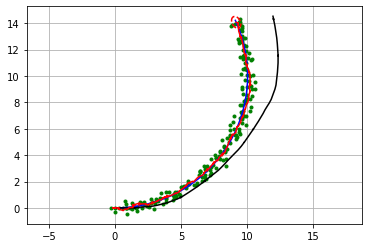

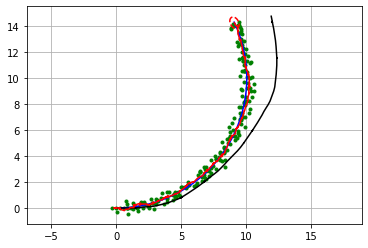

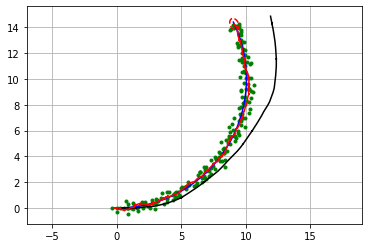

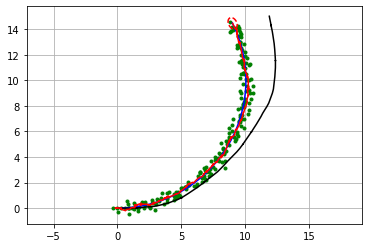

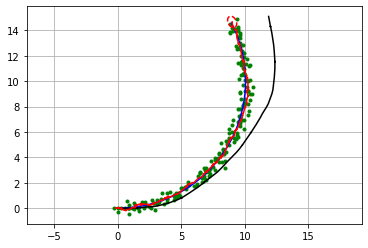

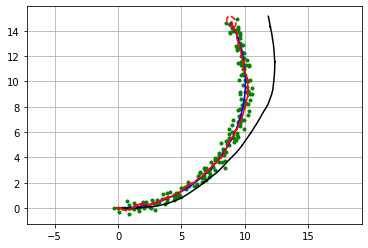

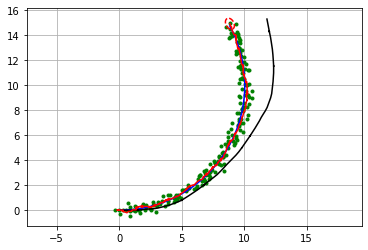

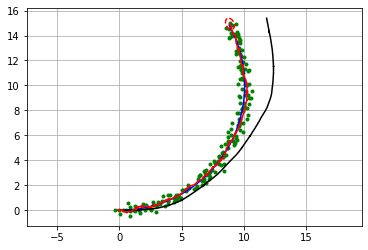

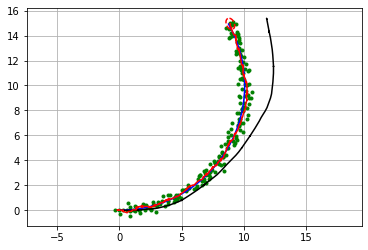

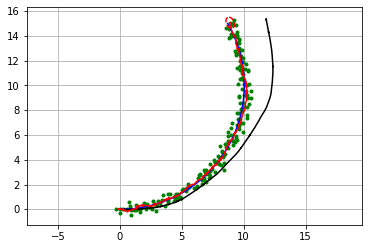

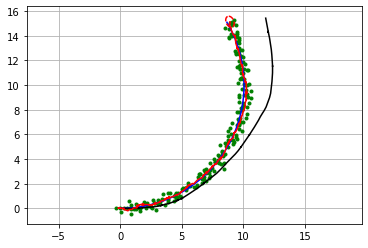

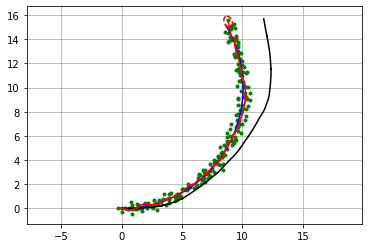

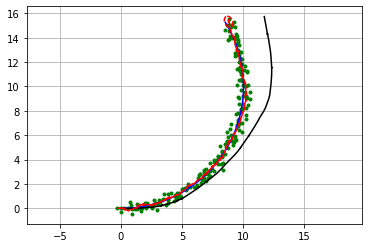

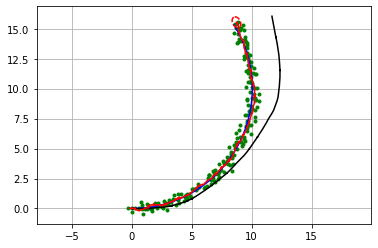

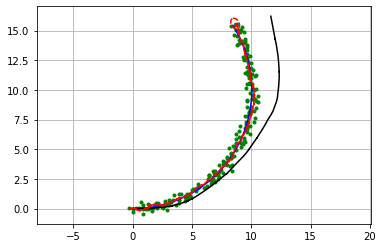

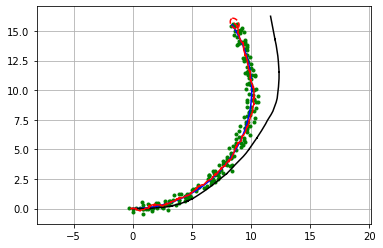

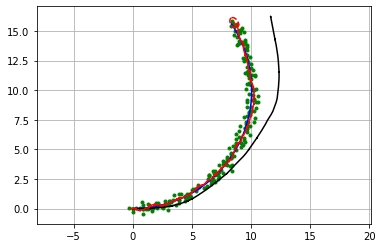

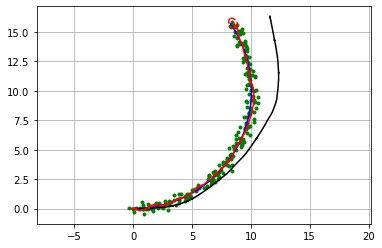

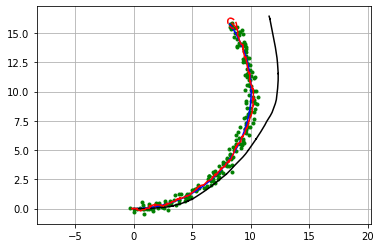

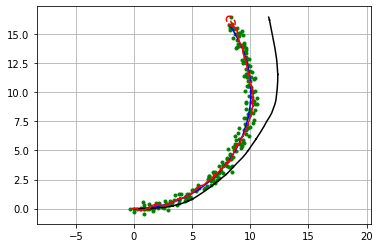

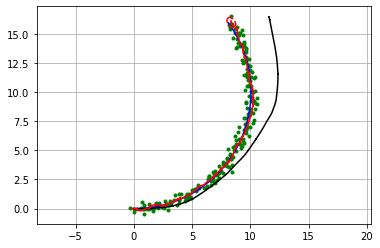

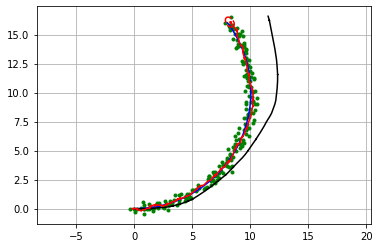

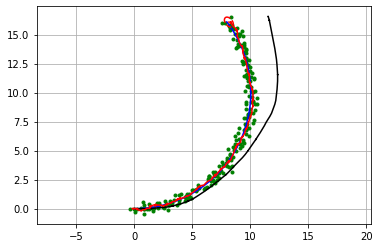

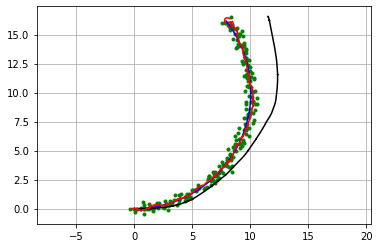

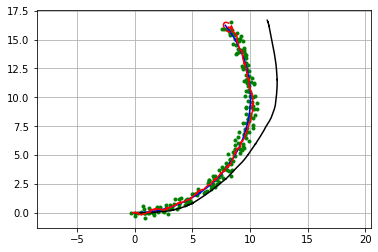

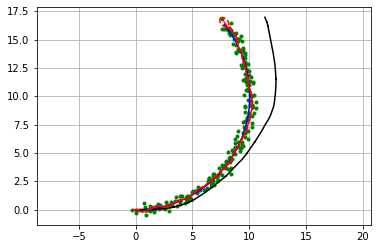

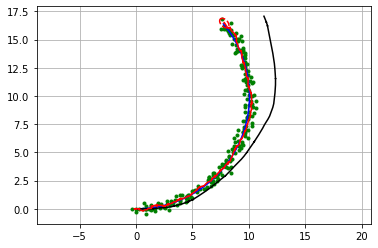

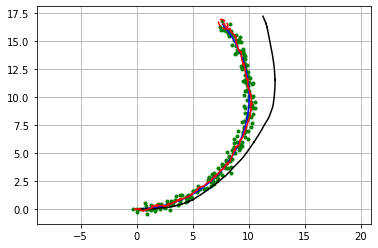

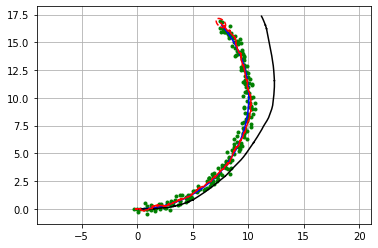

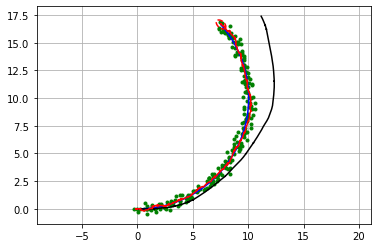

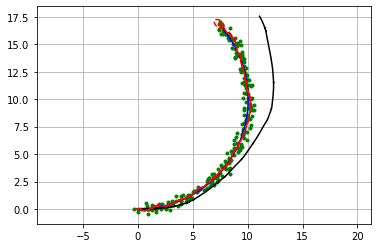

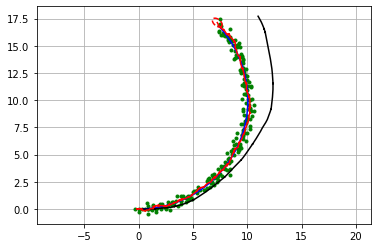

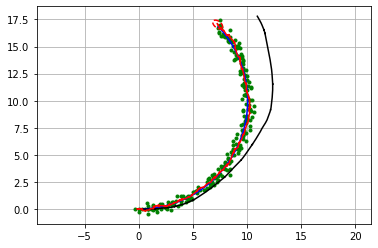

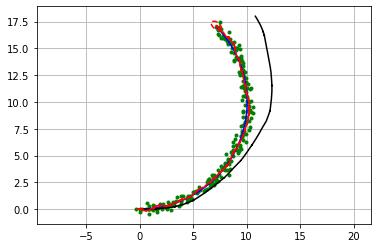

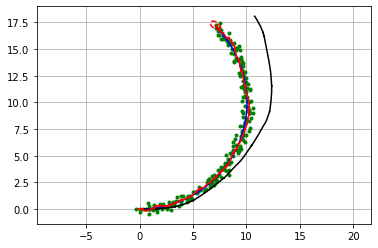

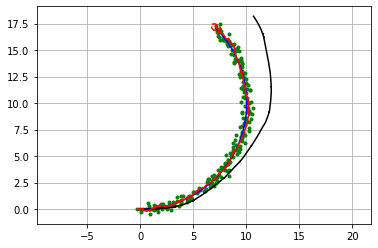

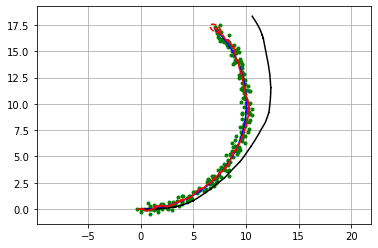

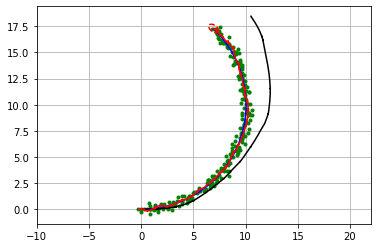

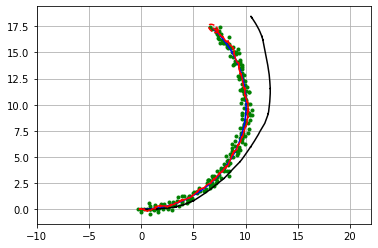

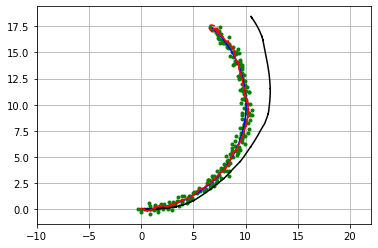

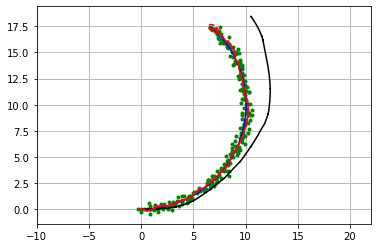

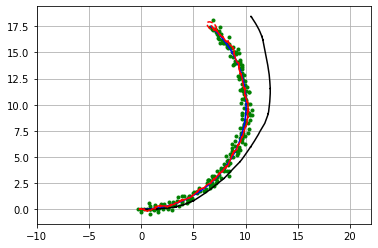

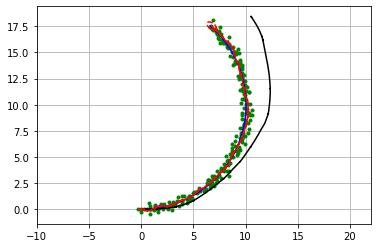

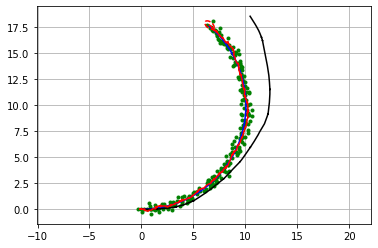

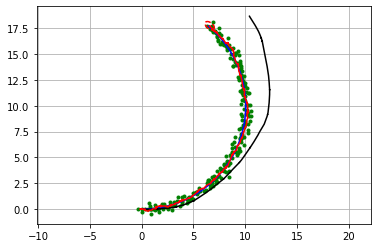

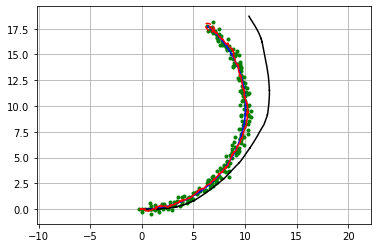

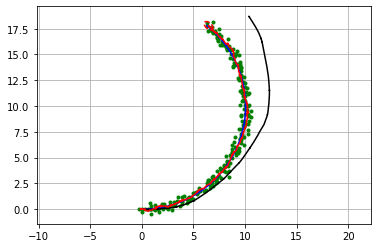

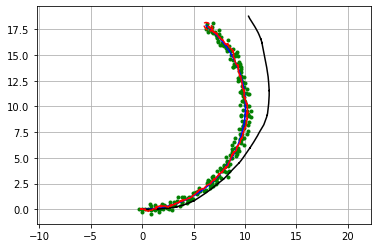

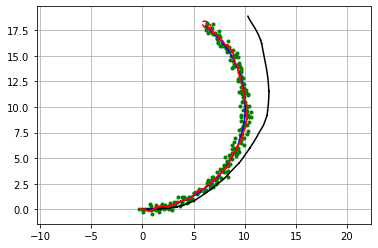

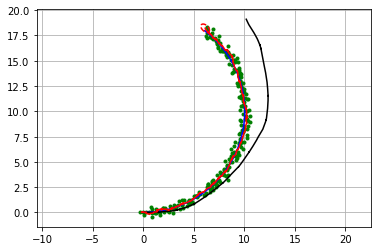

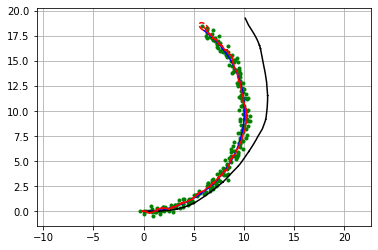

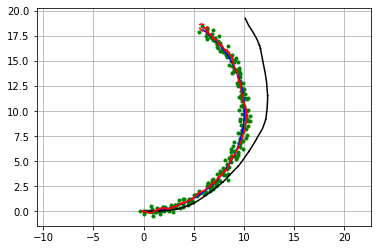

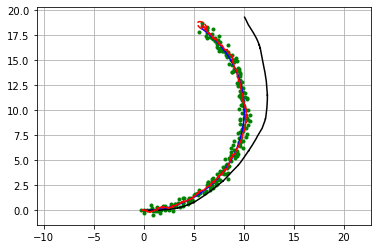

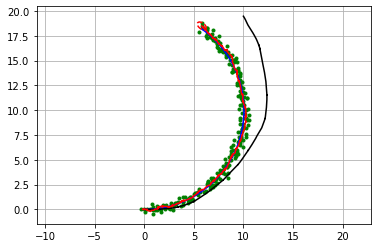

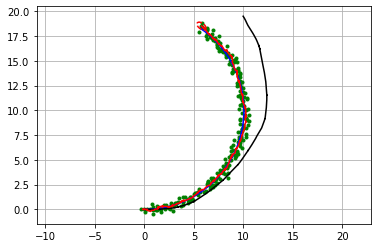

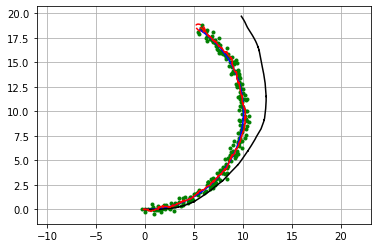

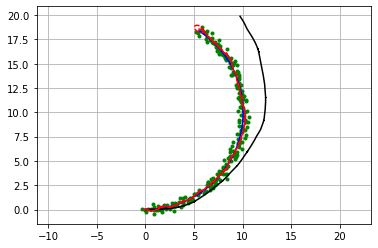

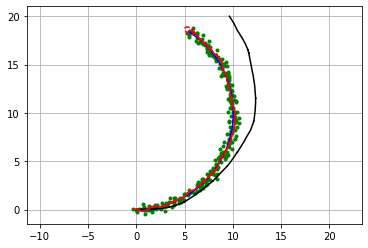

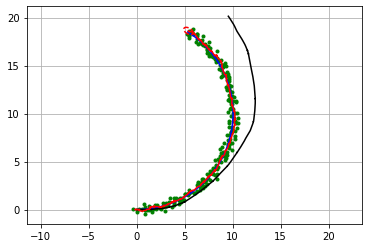

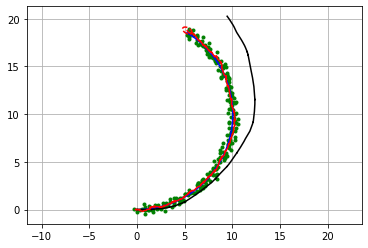

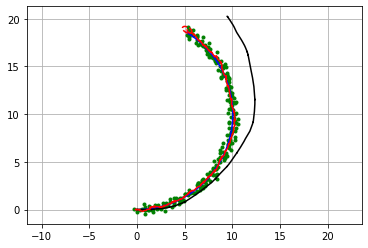

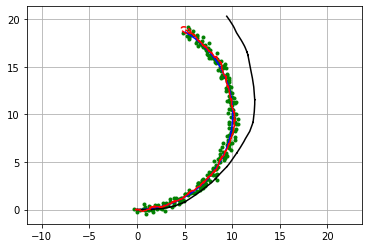

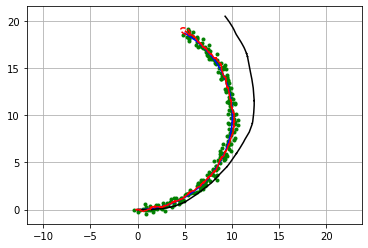

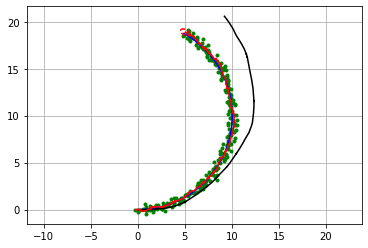

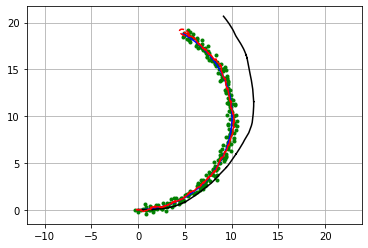

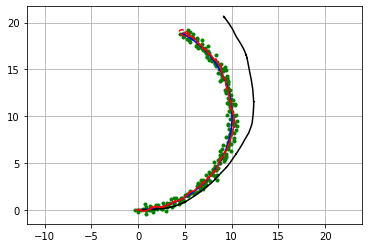

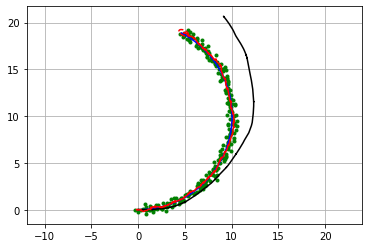

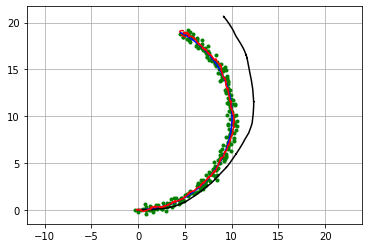

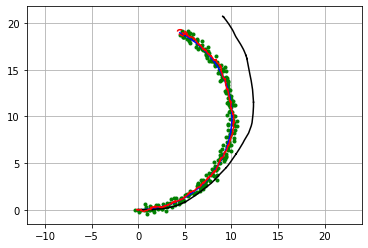

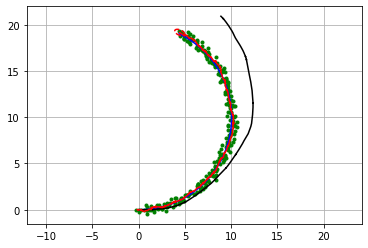

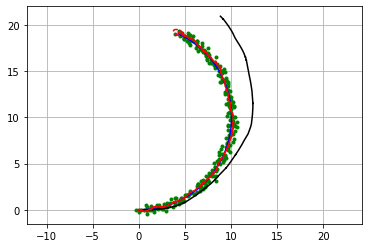

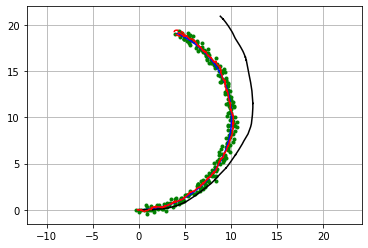

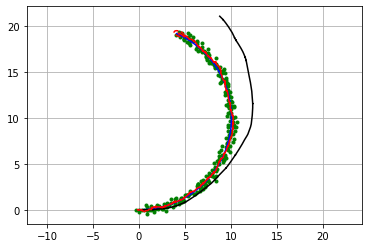

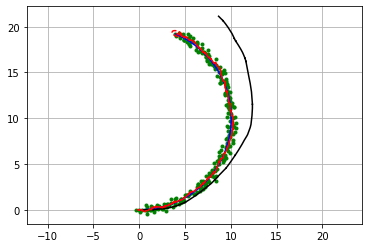

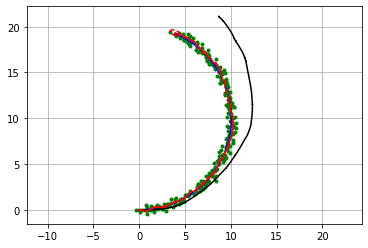

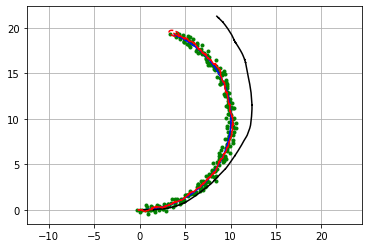

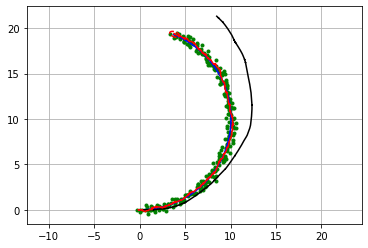

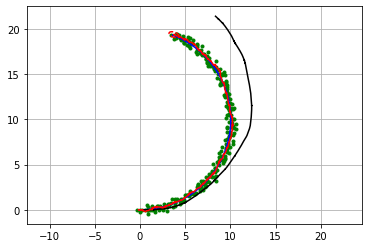

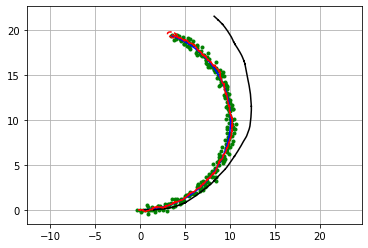

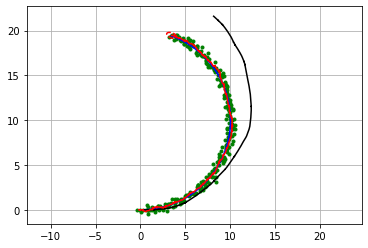

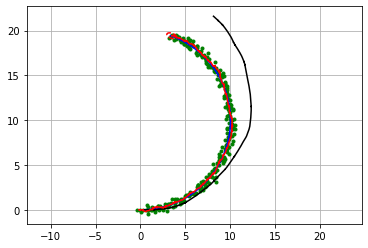

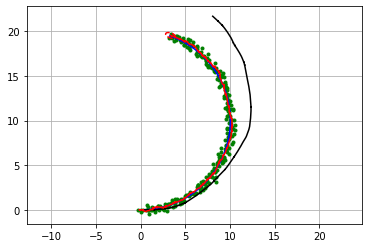

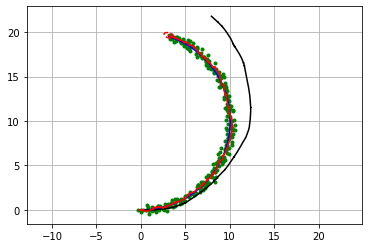

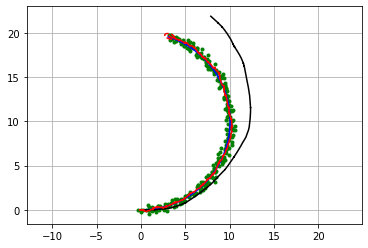

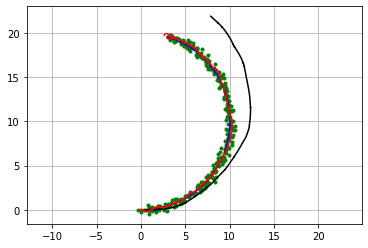

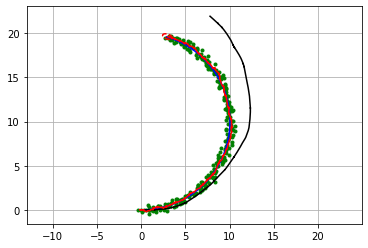

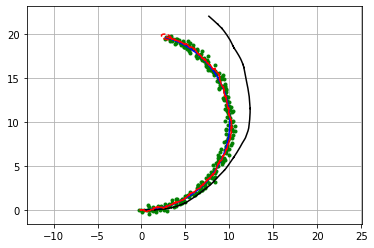

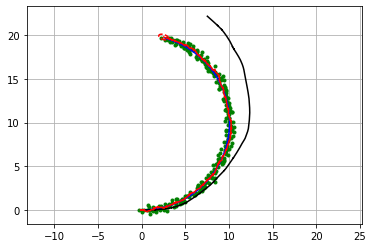

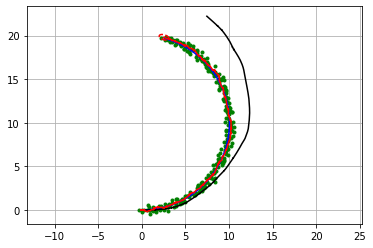

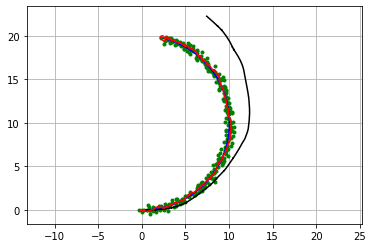

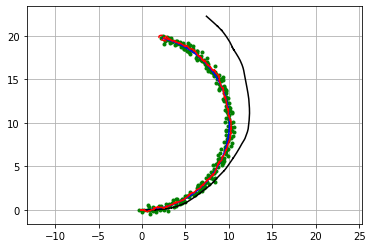

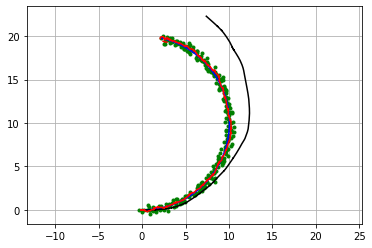

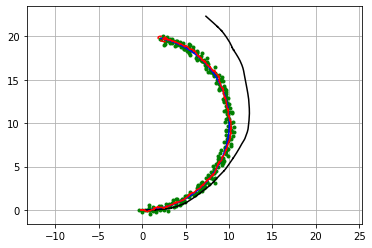

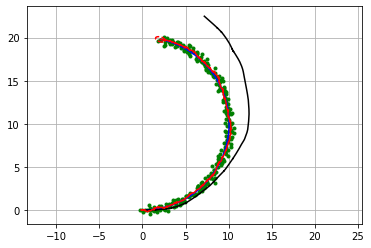

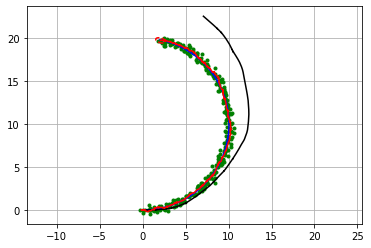

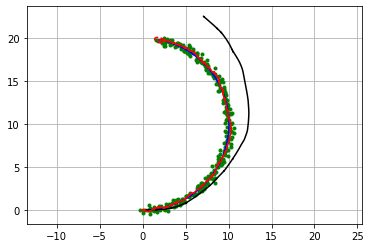

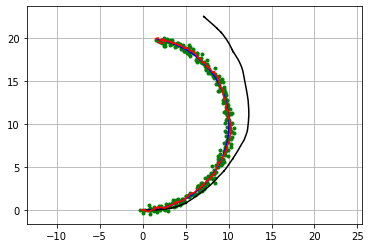

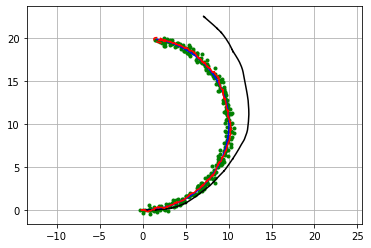

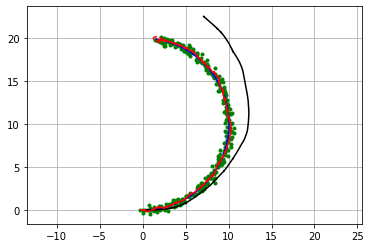

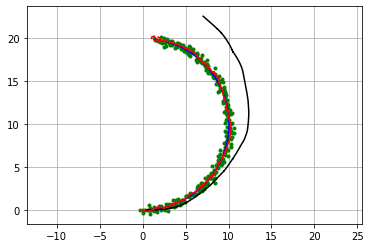

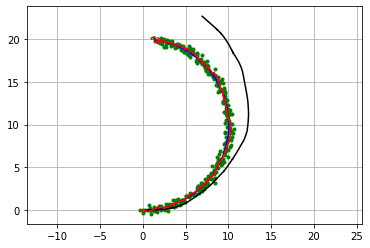

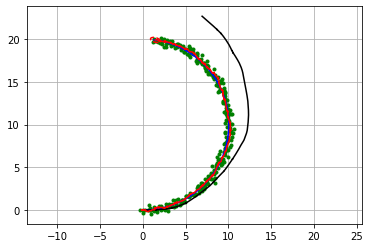

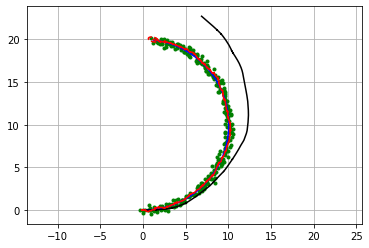

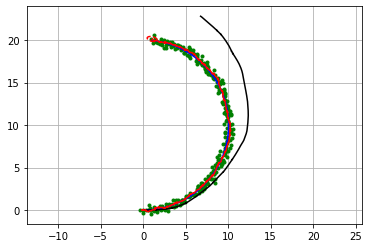

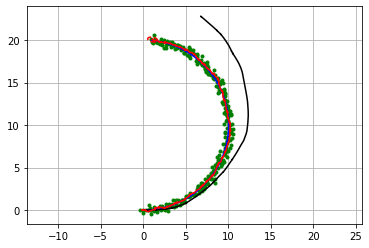

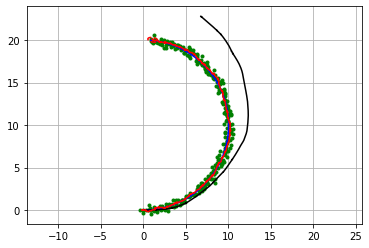

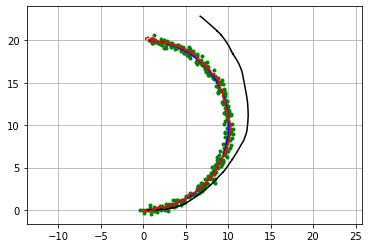

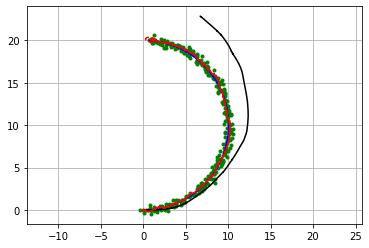

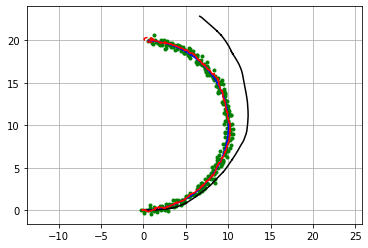

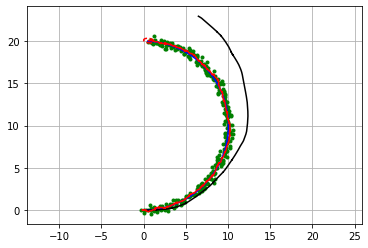

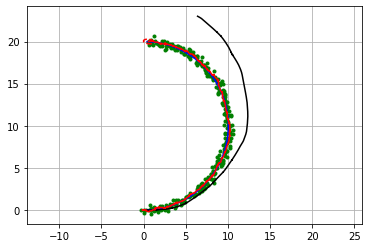

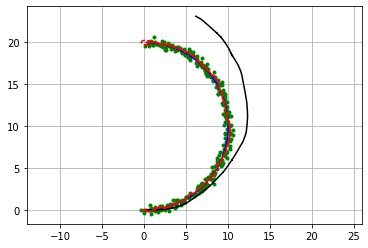

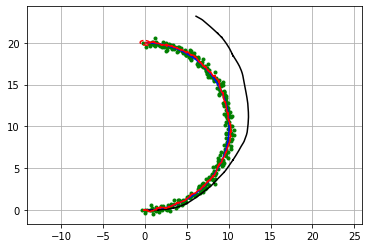

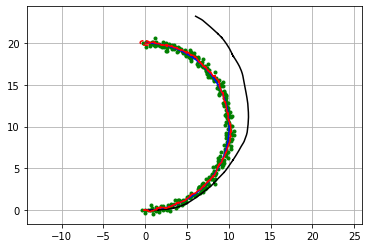

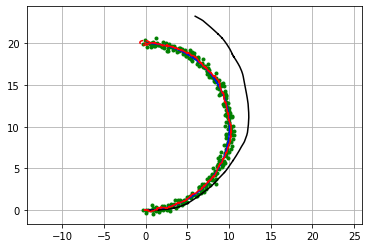

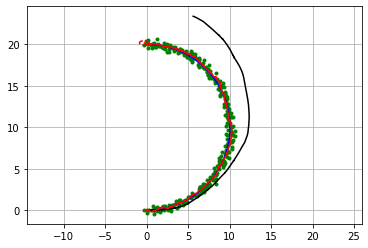

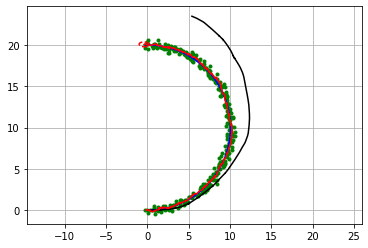

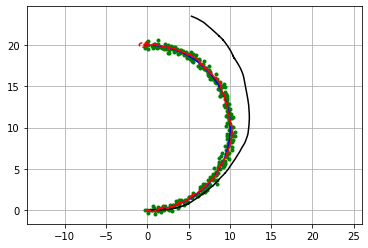

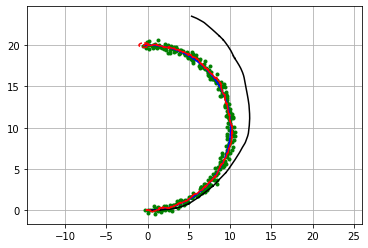

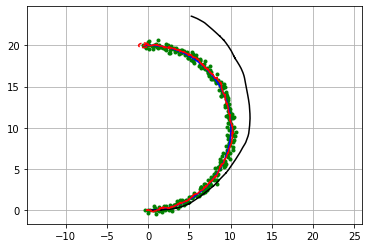

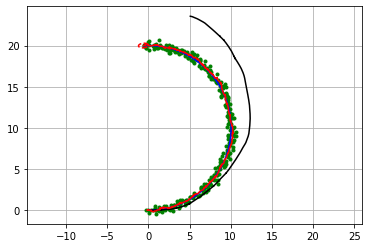

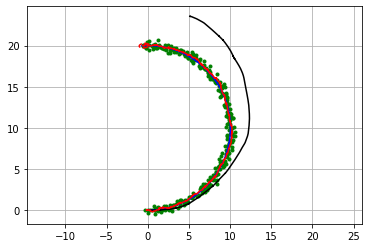

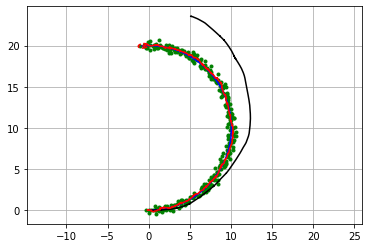

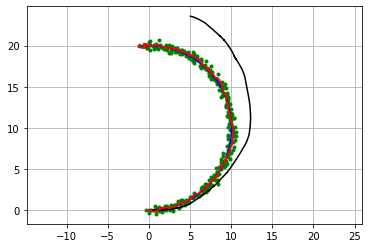

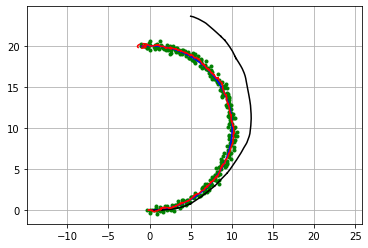

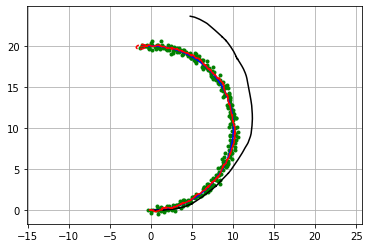

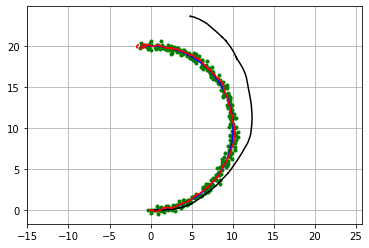

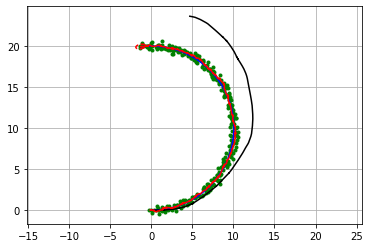

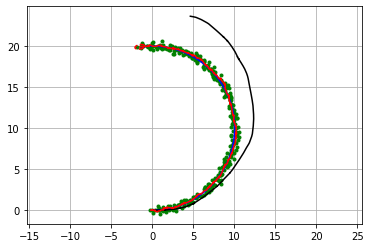

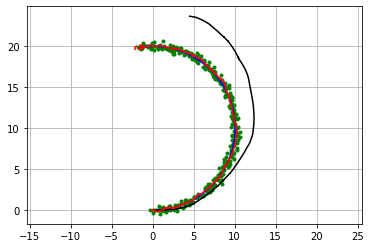

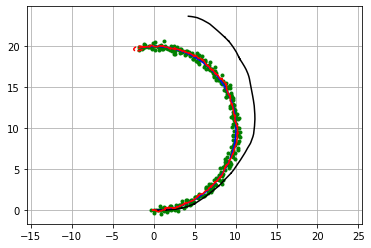

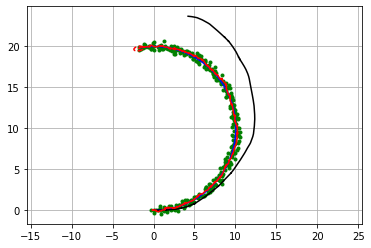

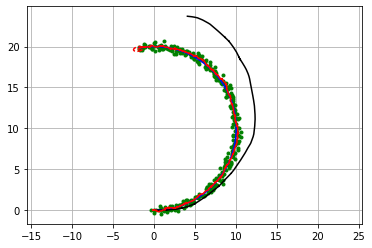

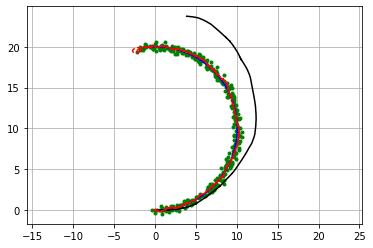

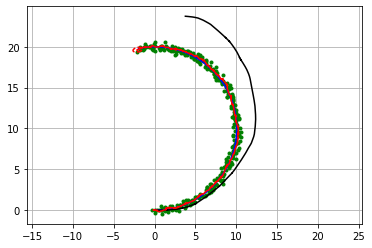

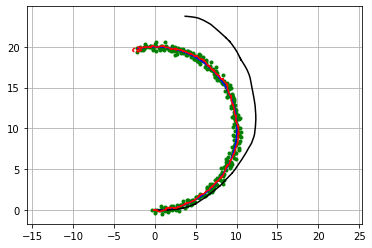

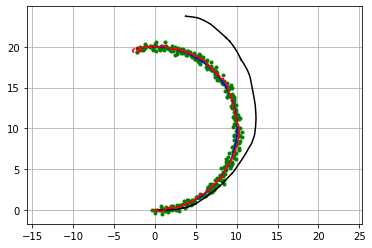

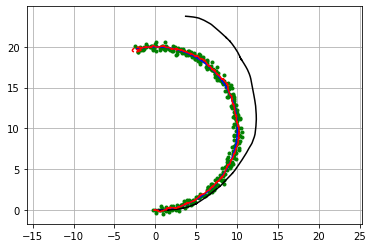

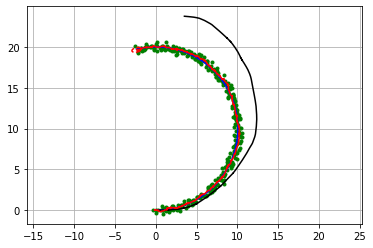

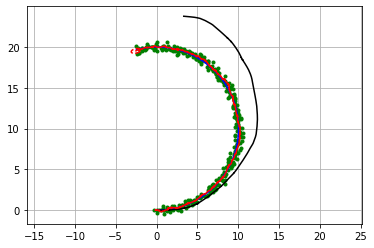

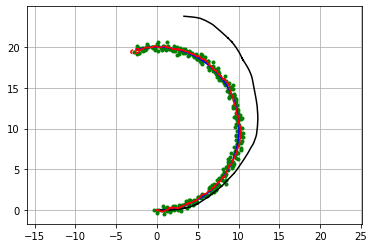

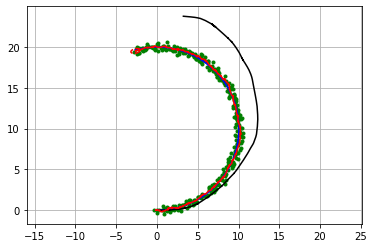

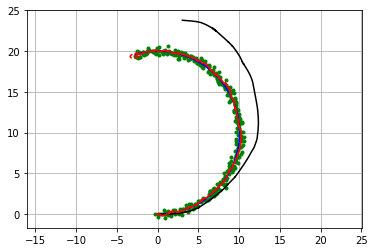

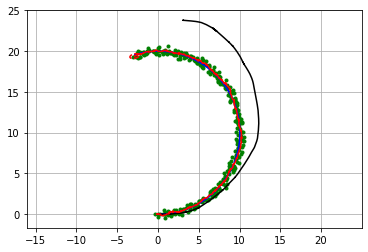

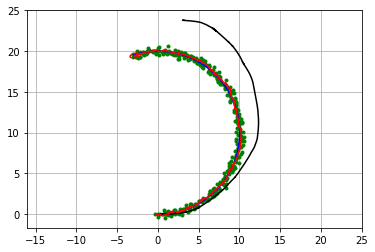

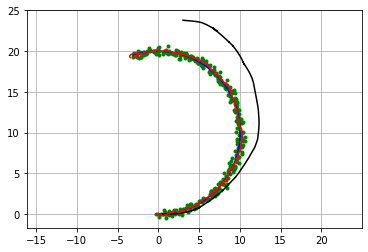

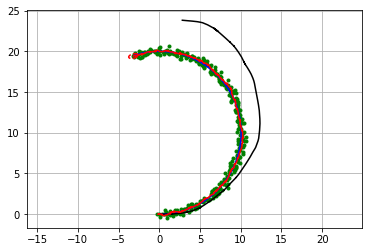

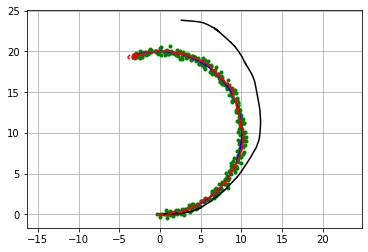

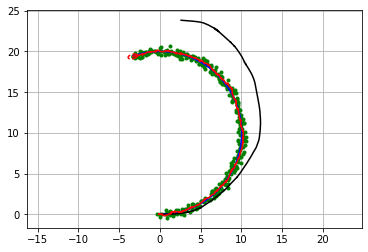

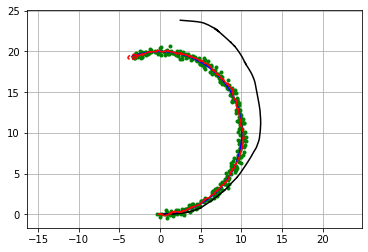

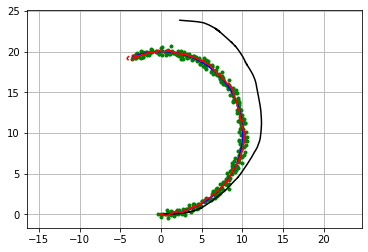

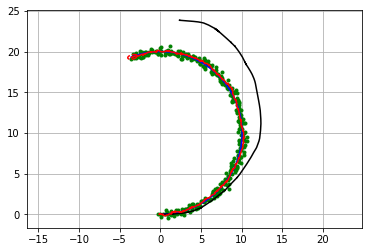

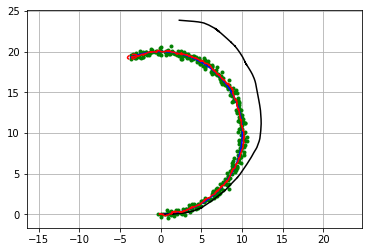

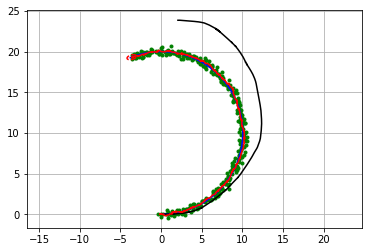

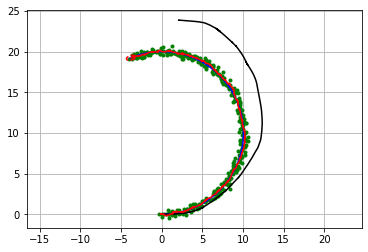

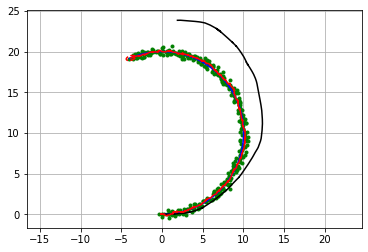

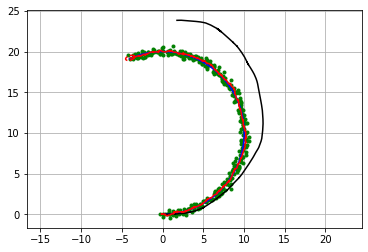

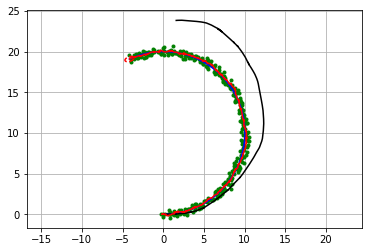

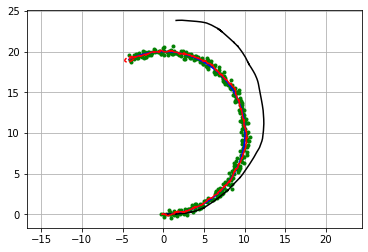

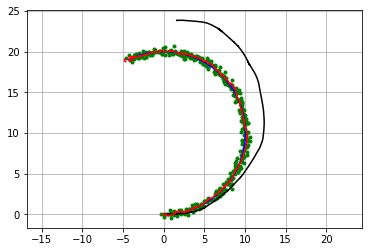

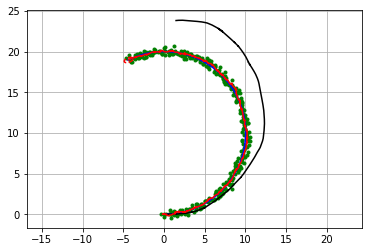

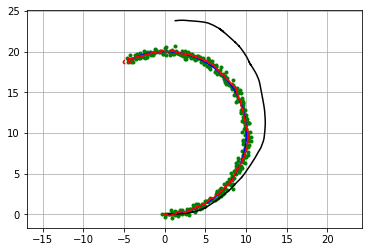

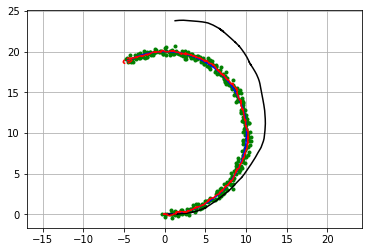

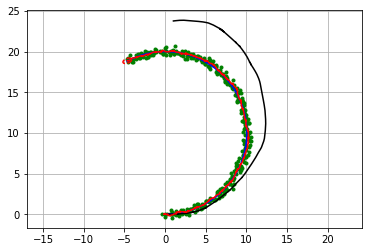

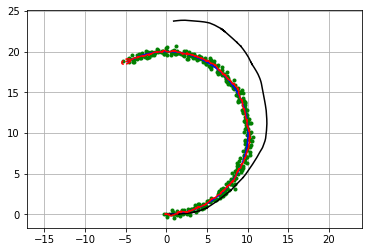

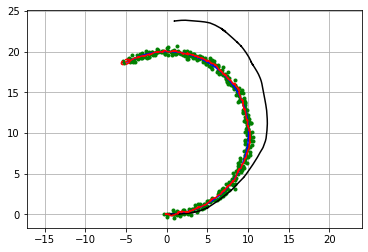

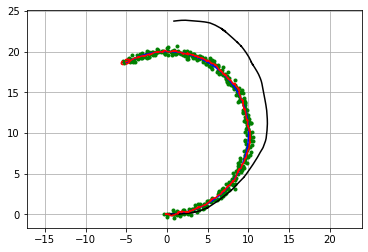

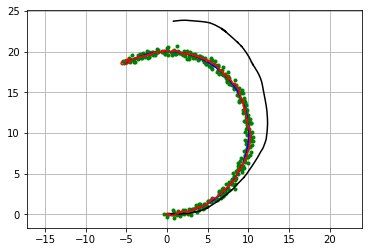

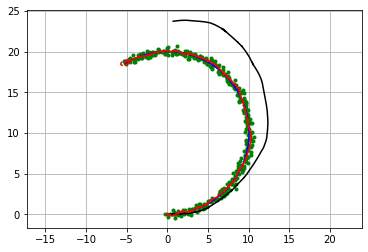

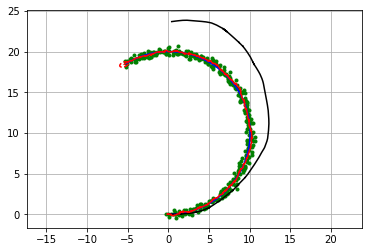

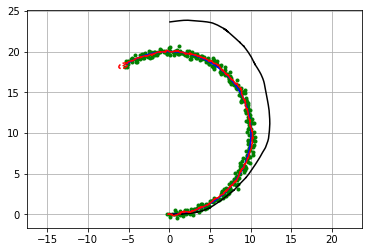

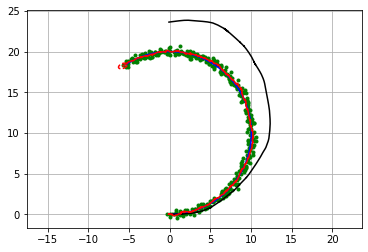

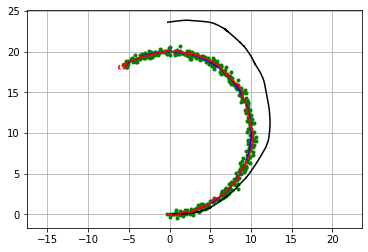

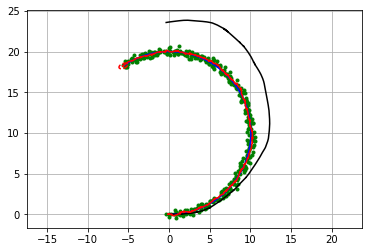

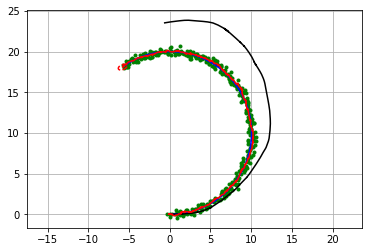

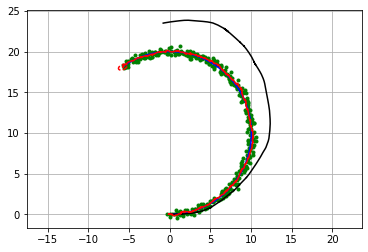

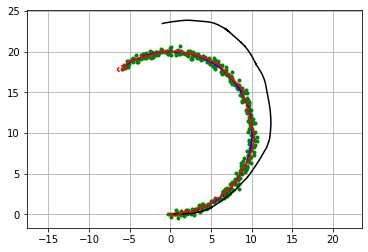

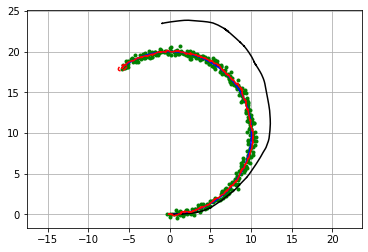

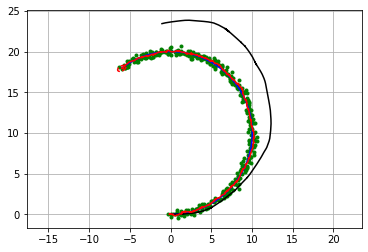

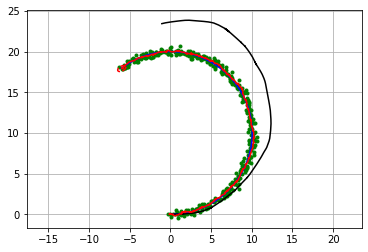

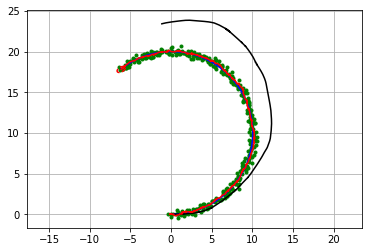

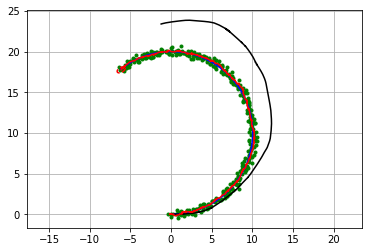

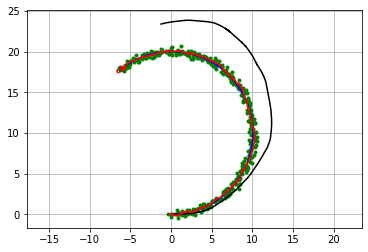

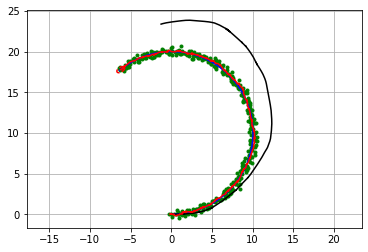

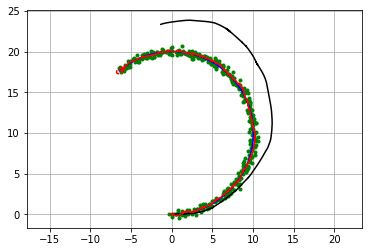

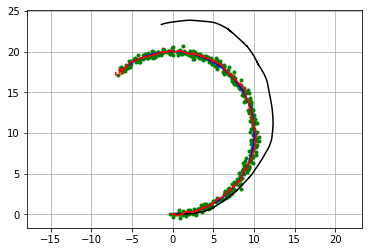

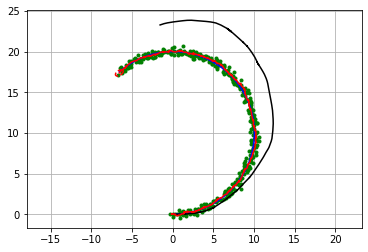

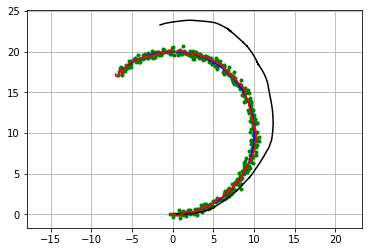

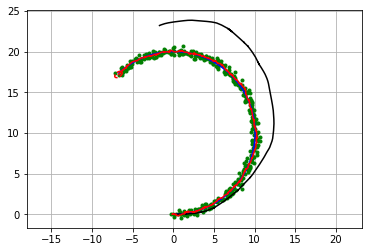

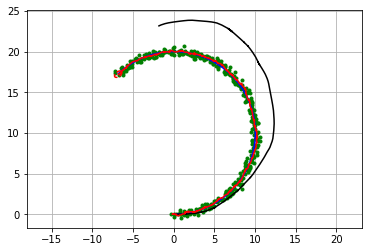

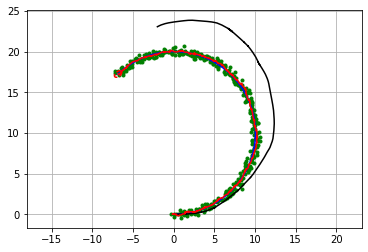

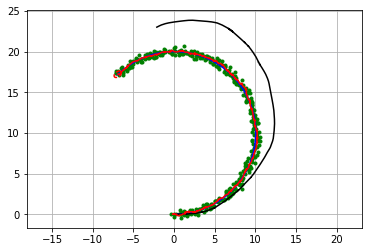

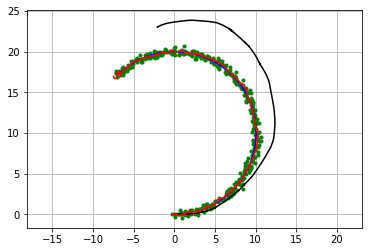

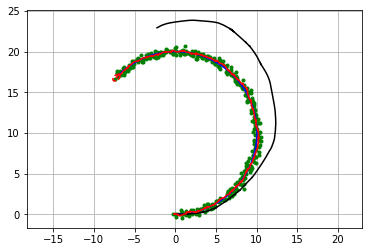

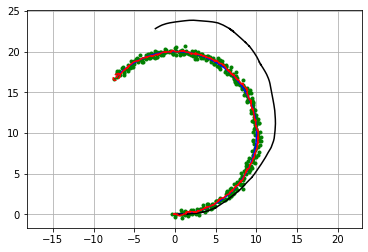

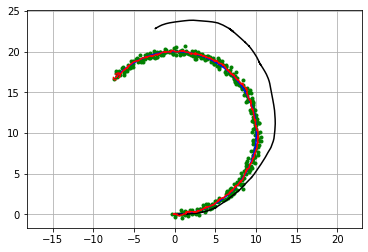

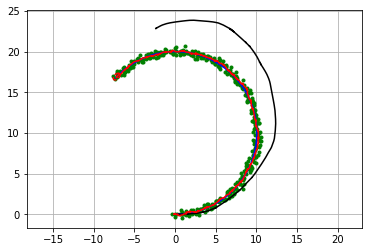

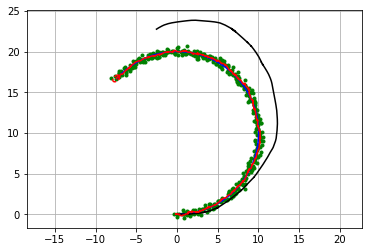

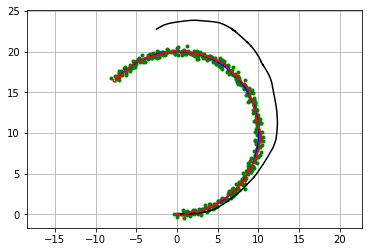

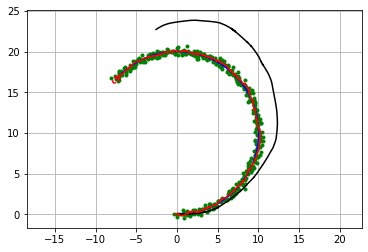

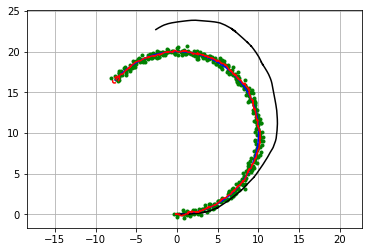

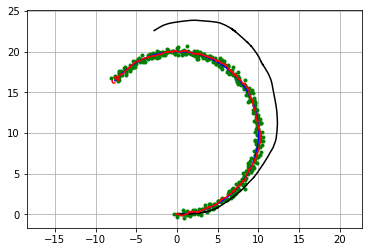

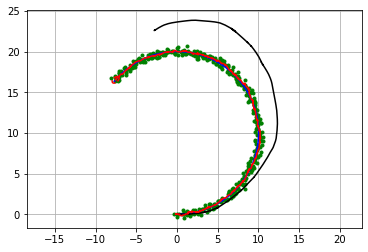

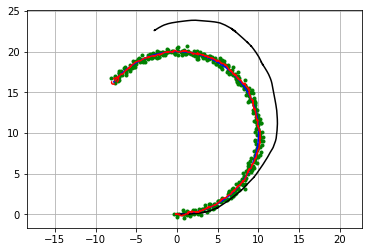

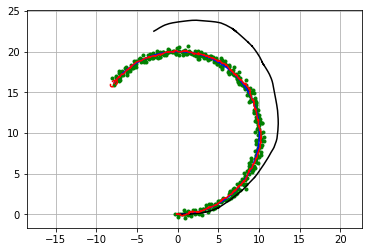

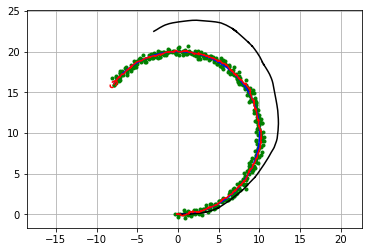

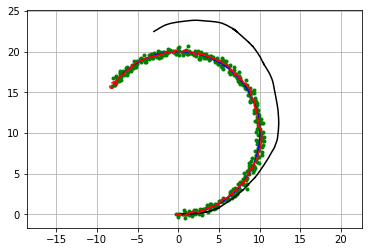

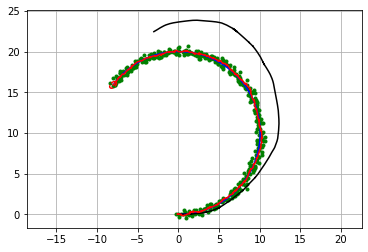

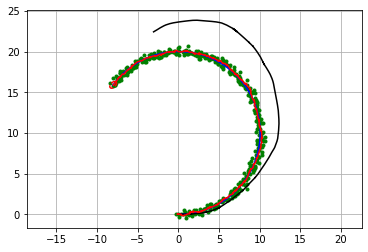

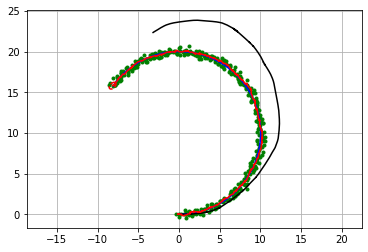

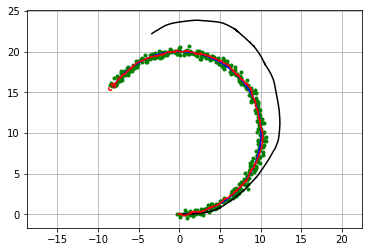

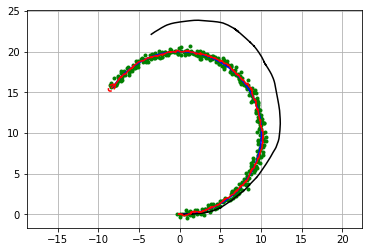

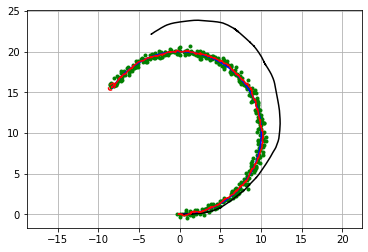

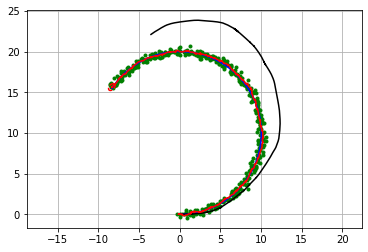

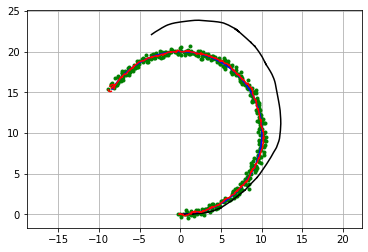

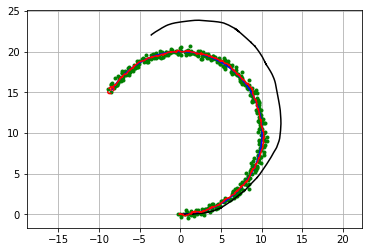

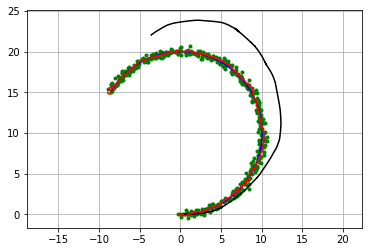

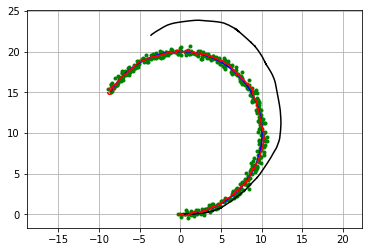

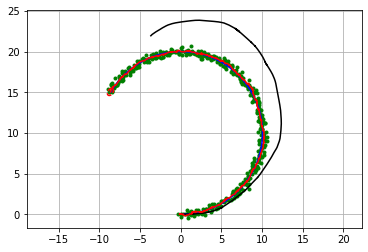

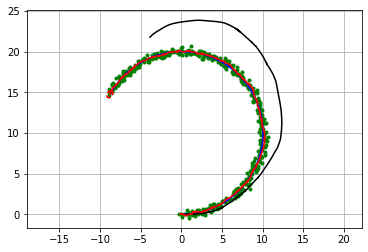

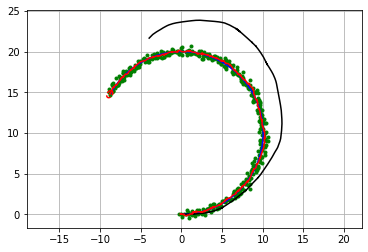

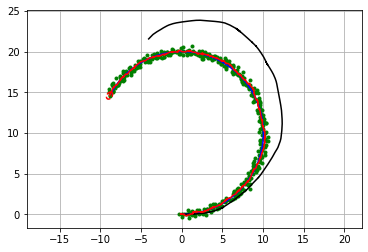

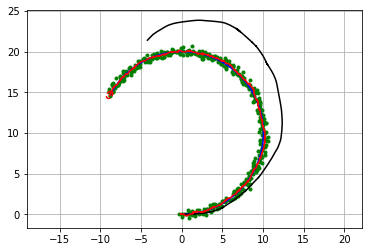

KeyboardInterrupt: 

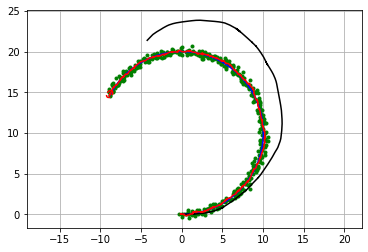

In [8]:

"""

Extended kalman filter (EKF) localization sample

author: Atsushi Sakai (@Atsushi_twi)

"""

import numpy as np
import math
import matplotlib.pyplot as plt

# Estimation parameter of EKF
Q = np.diag([0.1, 0.1, math.radians(1.0), 1.0])**2
R = np.diag([1.0, math.radians(40.0)])**2

#  Simulation parameter
Qsim = np.diag([0.5, 0.5])**2
Rsim = np.diag([1.0, math.radians(30.0)])**2

DT = 0.1  # time tick [s]
SIM_TIME = 50.0  # simulation time [s]

show_animation = True


def calc_input():
    v = 1.0  # [m/s]
    yawrate = 0.1  # [rad/s]
    u = np.matrix([v, yawrate]).T
    return u


def observation(xTrue, xd, u):

    xTrue = motion_model(xTrue, u)

    # add noise to gps x-y
    zx = xTrue[0, 0] + np.random.randn() * Qsim[0, 0]
    zy = xTrue[1, 0] + np.random.randn() * Qsim[1, 1]
    z = np.matrix([zx, zy])

    # add noise to input
    ud1 = u[0, 0] + np.random.randn() * Rsim[0, 0]
    ud2 = u[1, 0] + np.random.randn() * Rsim[1, 1]
    ud = np.matrix([ud1, ud2]).T

    xd = motion_model(xd, ud)

    return xTrue, z, xd, ud


def motion_model(x, u):

    F = np.matrix([[1.0, 0, 0, 0],
                   [0, 1.0, 0, 0],
                   [0, 0, 1.0, 0],
                   [0, 0, 0, 0]])

    B = np.matrix([[DT * math.cos(x[2, 0]), 0],
                   [DT * math.sin(x[2, 0]), 0],
                   [0.0, DT],
                   [1.0, 0.0]])

    x = F * x + B * u

    return x


def observation_model(x):
    #  Observation Model
    H = np.matrix([
        [1, 0, 0, 0],
        [0, 1, 0, 0]
    ])

    z = H * x

    return z


def jacobF(x, u):
    """
    Jacobian of Motion Model
    motion model
    x_{t+1} = x_t+v*dt*cos(yaw)
    y_{t+1} = y_t+v*dt*sin(yaw)
    yaw_{t+1} = yaw_t+omega*dt
    v_{t+1} = v{t}
    so
    dx/dyaw = -v*dt*sin(yaw)
    dx/dv = dt*cos(yaw)
    dy/dyaw = v*dt*cos(yaw)
    dy/dv = dt*sin(yaw)
    """
    yaw = x[2, 0]
    v = u[0, 0]
    jF = np.matrix([
        [1.0, 0.0, -DT * v * math.sin(yaw), DT * math.cos(yaw)],
        [0.0, 1.0, DT * v * math.cos(yaw), DT * math.sin(yaw)],
        [0.0, 0.0, 1.0, 0.0],
        [0.0, 0.0, 0.0, 1.0]])

    return jF


def jacobH(x):
    # Jacobian of Observation Model
    jH = np.matrix([
        [1, 0, 0, 0],
        [0, 1, 0, 0]
    ])

    return jH


def ekf_estimation(xEst, PEst, z, u):

    #  Predict
    xPred = motion_model(xEst, u)
    jF = jacobF(xPred, u)
    PPred = jF * PEst * jF.T + Q

    #  Update
    jH = jacobH(xPred)
    zPred = observation_model(xPred)
    y = z.T - zPred
    S = jH * PPred * jH.T + R
    K = PPred * jH.T * np.linalg.inv(S)
    xEst = xPred + K * y
    PEst = (np.eye(len(xEst)) - K * jH) * PPred

    return xEst, PEst


def plot_covariance_ellipse(xEst, PEst):
    Pxy = PEst[0:2, 0:2]
    eigval, eigvec = np.linalg.eig(Pxy)

    if eigval[0] >= eigval[1]:
        bigind = 0
        smallind = 1
    else:
        bigind = 1
        smallind = 0

    t = np.arange(0, 2 * math.pi + 0.1, 0.1)
    a = math.sqrt(eigval[bigind])
    b = math.sqrt(eigval[smallind])
    x = [a * math.cos(it) for it in t]
    y = [b * math.sin(it) for it in t]
    angle = math.atan2(eigvec[bigind, 1], eigvec[bigind, 0])
    R = np.matrix([[math.cos(angle), math.sin(angle)],
                   [-math.sin(angle), math.cos(angle)]])
    fx = R * np.matrix([x, y])
    px = np.array(fx[0, :] + xEst[0, 0]).flatten()
    py = np.array(fx[1, :] + xEst[1, 0]).flatten()
    plt.plot(px, py, "--r")


def main():

    time = 0.0

    # State Vector [x y yaw v]'
    xEst = np.matrix(np.zeros((4, 1)))
    xTrue = np.matrix(np.zeros((4, 1)))
    PEst = np.eye(4)

    xDR = np.matrix(np.zeros((4, 1)))  # Dead reckoning

    # history
    hxEst = xEst
    hxTrue = xTrue
    hxDR = xTrue
    hz = np.zeros((1, 2))

    while SIM_TIME >= time:
        time += DT
        u = calc_input()

        xTrue, z, xDR, ud = observation(xTrue, xDR, u)

        xEst, PEst = ekf_estimation(xEst, PEst, z, ud)

        # store data history
        hxEst = np.hstack((hxEst, xEst))
        hxDR = np.hstack((hxDR, xDR))
        hxTrue = np.hstack((hxTrue, xTrue))
        hz = np.vstack((hz, z))

        if show_animation:
            plt.cla()
            plt.plot(hz[:, 0], hz[:, 1], ".g")
            plt.plot(np.array(hxTrue[0, :]).flatten(),
                     np.array(hxTrue[1, :]).flatten(), "-b")
            plt.plot(np.array(hxDR[0, :]).flatten(),
                     np.array(hxDR[1, :]).flatten(), "-k")
            plt.plot(np.array(hxEst[0, :]).flatten(),
                     np.array(hxEst[1, :]).flatten(), "-r")
            plot_covariance_ellipse(xEst, PEst)
            plt.axis("equal")
            plt.grid(True)
            plt.pause(0.001)


if __name__ == '__main__':
    main()